# Load Data

In [1]:
import pandas as pd

In [2]:
file_path = "Dataset Tugas.xlsx"

In [3]:
df = pd.read_excel(file_path, sheet_name='Produksi beras')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Luas_Lahan_Ha           100 non-null    float64
 1   Curah_Hujan_mm_Musim    100 non-null    int64  
 2   Suhu_Rata_Rata_C_Musim  100 non-null    float64
 3   Pupuk_Digunakan_kg      100 non-null    int64  
 4   Produksi_Beras_Ton      100 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 4.0 KB


In [5]:
missing_value = df.isnull().sum()
print(missing_value)

Luas_Lahan_Ha             0
Curah_Hujan_mm_Musim      0
Suhu_Rata_Rata_C_Musim    0
Pupuk_Digunakan_kg        0
Produksi_Beras_Ton        0
dtype: int64


# Model Regresi

Model Regresi Linear berganda dengan 4 buah peubah bebas

In [6]:
df = df.rename(columns={
    'Produksi_Beras_Ton': 'Y',
    'Luas_Lahan_Ha': 'X1',
    'Curah_Hujan_mm_Musim': 'X2',
    'Suhu_Rata_Rata_C_Musim': 'X3',
    'Pupuk_Digunakan_kg': 'X4'
})

Y = df['Y']
X = df[['X1', 'X2', 'X3', 'X4']]

In [7]:
df

,X1,X2,X3,X4,Y
0,2.5,1500,27.5,250,8.5
1,3.0,1450,27.0,280,9.8
2,2.0,1600,28.0,220,7.2
3,3.5,1550,27.8,300,11.0
4,2.8,1480,27.3,265,9.1
...,...,...,...,...,...
95,3.1,1620,27.9,280,9.8
96,3.6,1570,27.4,310,11.5
97,2.6,1720,28.4,250,8.8
98,4.1,1670,28.2,330,12.8


In [8]:
#Jumlah Xi
import numpy as np

jumlah_x1 = df['X1'].sum()
jumlah_x2 = df['X2'].sum()
jumlah_x3 = df['X3'].sum()
jumlah_x4 = df['X4'].sum()
jumlah_y = df['Y'].sum()

print("\n===== Jumlah Xi =====")
print(f"Jumlah dari X1 : {jumlah_x1}")
print(f"Jumlah dari X2 : {jumlah_x2}")
print(f"Jumlah dari X3 : {jumlah_x3}")
print(f"Jumlah dari X4 : {jumlah_x4}")
print(f"Jumlah dari Y : {jumlah_y}")


===== Jumlah Xi =====
Jumlah dari X1 : 301.00000000000006
Jumlah dari X2 : 156850
Jumlah dari X3 : 2764.5
Jumlah dari X4 : 27425
Jumlah dari Y : 977.4999999999999


In [9]:
#Jumlah Xi^2
jumlah_x1_kuadrat = (df['X1']**2).sum()
jumlah_x2_kuadrat = (df['X2']**2).sum()
jumlah_x3_kuadrat = (df['X3']**2).sum()
jumlah_x4_kuadrat = (df['X4']**2).sum()

print("\n===== Jumlah Xi^2 =====")
print(f"Jumlah X1^2: {jumlah_x1_kuadrat}")
print(f"Jumlah X2^2: {jumlah_x2_kuadrat}")
print(f"Jumlah X3^2: {jumlah_x3_kuadrat}")
print(f"Jumlah X4^2: {jumlah_x4_kuadrat}")


===== Jumlah Xi^2 =====
Jumlah X1^2: 934.3
Jumlah X2^2: 246438500
Jumlah X3^2: 76439.84999999999
Jumlah X4^2: 7605375


In [10]:
# jumlah Xi*Xi
jumlah_x1_x2 = (df['X1'] * df['X2']).sum()
jumlah_x1_x3 = (df['X1'] * df['X3']).sum()
jumlah_x1_x4 = (df['X1'] * df['X4']).sum()
jumlah_x2_x3 = (df['X2'] * df['X3']).sum()
jumlah_x2_x4 = (df['X2'] * df['X4']).sum()
jumlah_x3_x4 = (df['X3'] * df['X4']).sum()

print("\n===== Jumlah Xi * Xi =====")
print(f"Jumlah X1*X2: {jumlah_x1_x2}")
print(f"Jumlah X1*X3: {jumlah_x1_x3}")
print(f"Jumlah X1*X4: {jumlah_x1_x4}")
print(f"Jumlah X2*X3: {jumlah_x2_x3}")
print(f"Jumlah X2*X4: {jumlah_x2_x4}")
print(f"Jumlah X3*X4: {jumlah_x3_x4}")


===== Jumlah Xi * Xi =====
Jumlah X1*X2: 471745.0
Jumlah X1*X3: 8318.050000000001
Jumlah X1*X4: 84082.5
Jumlah X2*X3: 4338485.0
Jumlah X2*X4: 42986500
Jumlah X3*X4: 757925.0


In [11]:
# Jumlah Xi*Y

jumlah_x1_y = (df['X1'] * df['Y']).sum()
jumlah_x2_y = (df['X2'] * df['Y']).sum()
jumlah_x3_y = (df['X3'] * df['Y']).sum()
jumlah_x4_y = (df['X4'] * df['Y']).sum()

print("\n===== Jumlah Xi * Y =====")
print(f"Jumlah X1*Y: {jumlah_x1_y}")
print(f"Jumlah X2*Y: {jumlah_x2_y}")
print(f"Jumlah X3*Y: {jumlah_x3_y}")
print(f"Jumlah X4*Y: {jumlah_x4_y}")


===== Jumlah Xi * Y =====
Jumlah X1*Y: 3017.6
Jumlah X2*Y: 1532554.0
Jumlah X3*Y: 27016.069999999996
Jumlah X4*Y: 272171.5


In [12]:
# Persamaan Normal

n = 100
A = np.array([
    [n, jumlah_x1, jumlah_x2, jumlah_x3, jumlah_x4],
    [jumlah_x1, jumlah_x1_kuadrat, jumlah_x1_x2, jumlah_x1_x3, jumlah_x1_x4],
    [jumlah_x2, jumlah_x1_x2, jumlah_x2_kuadrat, jumlah_x2_x3, jumlah_x2_x4],
    [jumlah_x3, jumlah_x1_x3, jumlah_x2_x3, jumlah_x3_kuadrat, jumlah_x3_x4],
    [jumlah_x4, jumlah_x1_x4, jumlah_x2_x4, jumlah_x3_x4, jumlah_x4_kuadrat]
])
b = np.array([jumlah_y, jumlah_x1_y,jumlah_x2_y, jumlah_x3_y, jumlah_x4_y])

print("\n============== Persamaan Normal ==============")
n = A.shape[0]
for i in range(n):
    persamaan = ""
    for j in range(n):
        coef = A[i][j]
        var = f"b_{j}"
        if j != 0:
            persamaan += " + "
        persamaan += f"{coef:.4f} {var}"
    persamaan += f" = {b[i]:.4f}"
    print(persamaan)


============== Persamaan Normal ==============
100.0000 b_0 + 301.0000 b_1 + 156850.0000 b_2 + 2764.5000 b_3 + 27425.0000 b_4 = 977.5000
301.0000 b_0 + 934.3000 b_1 + 471745.0000 b_2 + 8318.0500 b_3 + 84082.5000 b_4 = 3017.6000
156850.0000 b_0 + 471745.0000 b_1 + 246438500.0000 b_2 + 4338485.0000 b_3 + 42986500.0000 b_4 = 1532554.0000
2764.5000 b_0 + 8318.0500 b_1 + 4338485.0000 b_2 + 76439.8500 b_3 + 757925.0000 b_4 = 27016.0700
27425.0000 b_0 + 84082.5000 b_1 + 42986500.0000 b_2 + 757925.0000 b_3 + 7605375.0000 b_4 = 272171.5000


- Menggunakan np.linalg.solve untuk menyelesaikan sistem persamaan linear
np.linalg.solve(A, b) akan mengembalikan vektor solusi x, di mana A @ x = b
Dalam kasus kita, A adalah matriks koefisien dan b adalah vektor hasil
Vektor solusi yang dikembalikan akan berisi nilai-nilai b_0, b_1, b_2, b_3, dan b_4

In [13]:
try:
    # Menyelesaikan sistem persamaan linear A @ beta = b untuk mencari nilai beta (b_0, b_1, b_2, b_3, b_4)
    beta = np.linalg.solve(A, b)

    b_0, b_1, b_2, b_3, b_4 = beta

    print("\n============== Penyelesaian SPL (Nilai b_i) ==============")
    print(f"Nilai b_0: {b_0:.4f}")
    print(f"Nilai b_1: {b_1:.4f}")
    print(f"Nilai b_2: {b_2:.4f}")
    print(f"Nilai b_3: {b_3:.4f}")
    print(f"Nilai b_4: {b_4:.4f}")

    print("\n============== Persamaan Regresi ==============")
    print(f"Y = {b_0:.4f} + {b_1:.4f}*X1 + {b_2:.4f}*X2 + {b_3:.4f}*X3 + {b_4:.4f}*X4")

except np.linalg.LinAlgError as e:
    # Menangani kasus jika matriks A adalah singular (tidak memiliki invers)
    # Ini bisa terjadi jika variabel independen sangat berkorelasi (multikolinearitas)
    print("\nError: Matriks koefisien tidak memiliki invers. Kemungkinan ada masalah multikolinearitas atau data.")
    print(e)
except Exception as e:
    # Menangani kesalahan lain yang mungkin terjadi selama perhitungan
    print("\nTerjadi kesalahan:", e)


============== Penyelesaian SPL (Nilai b_i) ==============
Nilai b_0: -0.4372
Nilai b_1: 1.5825
Nilai b_2: 0.0019
Nilai b_3: -0.1106
Nilai b_4: 0.0202

============== Persamaan Regresi ==============
Y = -0.4372 + 1.5825*X1 + 0.0019*X2 + -0.1106*X3 + 0.0202*X4


In [14]:
# Menghitung nilai y_pred menggunakan model regresi yang telah diperoleh
y_pred = b_0 + b_1 * df['X1'] + b_2 * df['X2'] + b_3 * df['X3'] + b_4 * df['X4']
df_comparison = pd.DataFrame({'Y_Asli': Y, 'Y_Prediksi': y_pred})

print("\n============== Perbandingan Y Asli dan Y Prediksi ==============")
df_comparison


============== Perbandingan Y Asli dan Y Prediksi ==============


,Y_Asli,Y_Prediksi
0,8.5,8.364963
1,9.8,9.721704
2,7.2,7.103062
3,11.0,11.017512
4,9.1,9.126411
...,...,...
95,9.8,10.102874
96,11.5,11.459616
97,8.8,8.840974
98,12.8,12.755423


In [15]:
y_bar = Y.mean()
print(f"Nilai Y_Bar: {y_bar:.4f}")

Nilai Y_Bar: 9.7750


Rumus JKT, JKR, dan JKG

image.png

In [16]:
print("\n================= Mencari JKT, JKG, dan JKR =================")
# Hitung JKT
JKT = ((df['Y'] - y_bar)**2).sum()
print(f"JKT (Total Sum of Squares): {JKT:.4f}")

# Hitung JKR
JKR = ((y_pred - y_bar)**2).sum()
print(f"JKR (Sum of Squares Regression): {JKR:.4f}")

# Hitung JKG
JKG = JKT - JKR
print(f"JKG (Sum of Squared Errors): {JKG:.4f}")


================= Mencari JKT, JKG, dan JKR =================
JKT (Total Sum of Squares): 202.0475
JKR (Sum of Squares Regression): 201.2540
JKG (Sum of Squared Errors): 0.7935


In [17]:
print("\n============== Koefisien Determinasi (R-squared) ==============")
r_squared = JKR / JKT
print(f"R-squared (Koefisien Determinasi): {r_squared:.4f}")

n = len(df)
k = 4
adjusted_r_squared = 1 - ((1 - r_squared) * (n - 1) / (n - k - 1))
print(f"Adjusted R-squared: {adjusted_r_squared:.4f}")

multiple_r = np.sqrt(r_squared)
print(f"Multiple R: {multiple_r:.4f}")


============== Koefisien Determinasi (R-squared) ==============
R-squared (Koefisien Determinasi): 0.9961
Adjusted R-squared: 0.9959
Multiple R: 0.9980


In [18]:
print("\n============== Standard Error of the Estimate ==============")
S_kuadrat = np.sqrt(JKG / (n - k - 1))
print(f"Standard Error of the Estimate (S^2): {S_kuadrat:.4f}")


============== Standard Error of the Estimate ==============
Standard Error of the Estimate (S^2): 0.0914


In [19]:
print("\n============== Mencari F-hitung dan F-tabel Keseluruhan ==============")

F_hitung = (JKR / k) / (JKG / (n - k - 1))
print(f"F-hitung: {F_hitung:.4f}")

from scipy.stats import f

k = 4
alpha = 0.05
df1 = k
df2 = n - k - 1

F_tabel = f.ppf(1 - alpha, df1, df2)
print(f"F-tabel (alpha={alpha}, df1={df1}, df2={df2}): {F_tabel:.4f}")

# Analisis hasil F-test
print("\n============== Analisis Hasil F-test ==============")
if F_hitung > F_tabel:
    print(f"F-hitung ({F_hitung:.4f}) > F-tabel ({F_tabel:.4f}).")
    print("Tolak H0: Setidaknya ada satu variabel independen yang berpengaruh signifikan terhadap variabel dependen secara simultan.")
else:
    print(f"F-hitung ({F_hitung:.4f}) <= F-tabel ({F_tabel:.4f}).")
    print("Gagal tolak H0: Variabel independen secara simultan tidak berpengaruh signifikan terhadap variabel dependen.")



============== Mencari F-hitung dan F-tabel Keseluruhan ==============
F-hitung: 6023.5400
F-tabel (alpha=0.05, df1=4, df2=95): 2.4675

============== Analisis Hasil F-test ==============
F-hitung (6023.5400) > F-tabel (2.4675).
Tolak H0: Setidaknya ada satu variabel independen yang berpengaruh signifikan terhadap variabel dependen secara simultan.


# Coba-coba metode regresi bertahap

Persamaan normal regresi

image.png

JKR GAIN

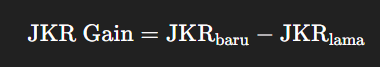

df_regression

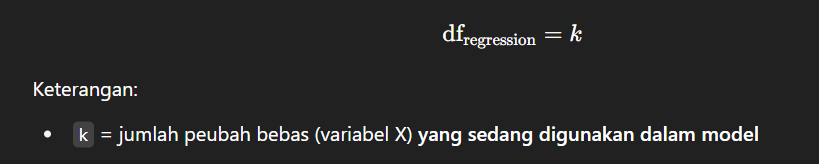


MSR : MSR mengukur variabilitas yang dijelaskan oleh model regresi, yaitu seberapa banyak perubahan pada variabel Y dapat dijelaskan oleh variabel X.

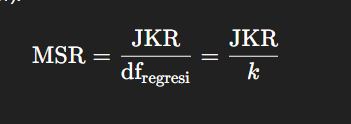

MSE: mengukur variabilitas sisa (error), yaitu variasi pada Y yang tidak dapat dijelaskan oleh model.

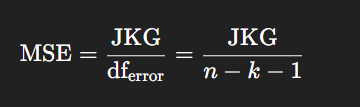

In [20]:
# jkr (Jumlah Kuadrat Regresi) dan jkg (Jumlah Kuadrat Galat)
def calculate_jkr(X, Y):
    """Menghitung Jumlah Kuadrat Regresi (jkr) untuk model regresi sederhana."""
    X_b = np.c_[np.ones(X.shape[0]), X]
    # Persamaan Normal: (X_b.T @ X_b) @ beta = X_b.T @ Y
    try:
        beta = np.linalg.solve(X_b.T @ X_b, X_b.T @ Y)
        y_pred = X_b @ beta
        y_mean = Y.mean()
        jkr = ((y_pred - y_mean)**2).sum()
        jkg = ((Y - y_pred)**2).sum()
        return jkr, jkg
    except np.linalg.LinAlgError:
        return 0, np.inf

def calculate_f_statistic(jkr, jkg, df_regression, df_error):
    """Menghitung F-statistik."""
    if df_error <= 0 or jkg == 0:
        return np.inf if jkr > 0 else 0
    msr = jkr / df_regression
    mse = jkg / df_error
    return msr / mse if mse > 0 else np.inf

def stepwise_regression(X, Y, alpha_in=0.05, alpha_out=0.05):
    """
    Melakukan metode regresi bertahap.

    Args:
        X (pd.DataFrame): Variabel independen.
        Y (pd.Series): Variabel dependen.
        alpha_in (float): Tingkat signifikansi untuk memasukkan variabel.
        alpha_out (float): Tingkat signifikansi untuk mengeluarkan variabel.

    Returns:
        list: Daftar variabel independen yang masuk dalam model akhir.
        tuple: Koefisien model akhir (intercept, betas).
        float: R-squared dari model akhir.
        float: Standard Error of the Estimate dari model akhir.
        float: F-hitung dari model akhir.
    """
    included = []
    excluded = list(X.columns)
    n = len(Y)
    current_jkg = ((Y - Y.mean())**2).sum() # Initial jkg awal
    current_model_jkr = 0
    current_model_dof = 0 # Degrees of freedom for regression

    print("================= Memulai Regresi Bertahap =================")

    while True:
        # Langkah 1: Masukkan peubah baru (Forward Selection Step)
        best_predictor = None
        best_f_in = -np.inf
        best_jkr_gain = 0

        # Dicoba satu per satu variabel dari yang belum masuk.
        #Dihitung kenaikan JKR dan nilai F (uji apakah berkontribusi signifikan).
        # Simpan variabel dengan F terbesar (jika F > F-tabel maka masuk).


        for predictor in excluded:
            temp_included = included + [predictor]
            X_temp = X[temp_included]

            # Calculate jkr and jkg for the model with the new predictor
            jkr_temp, jkg_temp = calculate_jkr(X_temp, Y)

            # Calculate the gain in jkr by adding this predictor
            # R(beta_new | beta_already_in_model) = jkr(model with new) - jkr(model without new)
            jkr_gain = jkr_temp - current_model_jkr

            # Degrees of freedom for the added predictor is 1
            df1 = 1
            df2 = n - len(temp_included) - 1

            # Calculate F-statistic for entering
            f_in = calculate_f_statistic(jkr_gain, jkg_temp, df1, df2)

            print(f"\nMenguji {predictor} untuk masuk:")
            print(f"  jkr Gain ({predictor} | {'+'.join(included) if included else 'Intercept'}): {jkr_gain:.4f}")
            print(f"  F-hitung ({predictor} masuk): {f_in:.4f}")

            if f_in > best_f_in:
                best_f_in = f_in
                best_predictor = predictor
                best_jkr_gain = jkr_gain
                best_jkg = jkg_temp


        # Check if the best predictor should enter the model
        df1_in = 1
        df2_in = n - len(included) - 1 - 1 # n - (p+1) - 1, where p is number of included vars

        if df2_in > 0:
             F_tabel_in = f.ppf(1 - alpha_in, df1_in, df2_in)
             print(f"  F-tabel ({best_predictor} masuk, alpha_in={alpha_in}, df1={df1_in}, df2={df2_in}): {F_tabel_in:.4f}")

             if best_predictor and best_f_in > F_tabel_in:
                 included.append(best_predictor)
                 excluded.remove(best_predictor)
                 current_model_jkr += best_jkr_gain
                 current_jkg = best_jkg
                 current_model_dof += 1
                 print(f"  {best_predictor} masuk dalam model.")

                 # Langkah 2: Uji peubah yang sudah ada (Backward Elimination Step)
                 while True:
                     worst_predictor = None
                     lowest_f_out = np.inf
                     predictor_to_remove_jkg = np.inf # jkg if this predictor is removed

                     for predictor in included:
                         temp_included = [p for p in included if p != predictor]
                         X_temp = X[temp_included]

                         # Calculate jkr and jkg for the model without this predictor
                         if len(temp_included) > 0:
                              jkr_temp, jkg_temp = calculate_jkr(X_temp, Y)
                         else: # If removing the last predictor, the model is just intercept
                              jkg_temp = ((Y - Y.mean())**2).sum()
                              jkr_temp = 0


                         # Calculate the reduction in jkr by removing this predictor
                         # R(beta_removed | beta_others_in_model) = jkr(model with removed) - jkr(model without removed)
                         jkr_reduction = current_model_jkr - jkr_temp

                         # Degrees of freedom for the removed predictor is 1
                         df1 = 1
                         df2 = n - len(included) - 1 # n - p - 1, where p is number of included vars

                         # Calculate F-statistic for exiting
                         if df2 > 0:
                             f_out = calculate_f_statistic(jkr_reduction, current_jkg, df1, df2) # Use current_jkg for the model with the predictor

                             print(f"\n  Menguji {predictor} untuk keluar:")
                             print(f"    jkr Reduction ({predictor} keluar | {'+'.join([p for p in included if p != predictor]) if [p for p in included if p != predictor] else 'Intercept'}): {jkr_reduction:.4f}")
                             print(f"    F-hitung ({predictor} keluar): {f_out:.4f}")

                             if f_out < lowest_f_out:
                                 lowest_f_out = f_out
                                 worst_predictor = predictor
                                 predictor_to_remove_jkg = jkg_temp

                         else: # Cannot remove if only one predictor left and n-p-1 <= 0
                             f_out = 0
                             print(f"\n  Menguji {predictor} untuk keluar:")
                             print(f"    Tidak dapat menguji {predictor} untuk keluar karena hanya ada satu prediktor dan DOF error <= 0.")


                     # Check if the worst predictor should leave the model
                     if worst_predictor:
                         df1_out = 1
                         df2_out = n - len(included) - 1

                         if df2_out > 0:
                              F_tabel_out = f.ppf(1 - alpha_out, df1_out, df2_out)
                              print(f"  F-tabel ({worst_predictor} keluar, alpha_out={alpha_out}, df1={df1_out}, df2={df2_out}): {F_tabel_out:.4f}")

                              if lowest_f_out < F_tabel_out:
                                  print(f"  {worst_predictor} keluar dari model.")
                                  excluded.append(worst_predictor)
                                  included.remove(worst_predictor)
                                  current_model_jkr -= (current_model_jkr - calculate_jkr(X[included], Y)[0])
                                  current_jkg = calculate_jkr(X[included], Y)[1]
                                  current_model_dof -= 1
                                  continue
                              else:
                                  print(f"  {worst_predictor} tetap dalam model.")
                                  break
                         else:
                              print("  Tidak ada variabel yang dikeluarkan karena DOF error <= 0.")
                              break
                     else:
                         break


             else:
                 print(f"  {best_predictor} tidak masuk dalam model (F-hitung <= F-tabel).")
                 break

        else:
            print("  Tidak ada variabel yang dimasukkan karena DOF error <= 0.")
            break

    print("\n================= Regresi Bertahap Selesai =================")
    print(f"Variabel yang masuk dalam model akhir: {included}")

    # Final Model Calculation
    if included:
        X_final = X[included]
        X_final_b = np.c_[np.ones(X_final.shape[0]), X_final]
        try:
            beta_final = np.linalg.solve(X_final_b.T @ X_final_b, X_final_b.T @ Y)
            y_pred_final = X_final_b @ beta_final

            # Calculate final metrics
            y_bar_final = Y.mean()
            JKT_final = ((Y - y_bar_final)**2).sum()
            JKR_final = ((y_pred_final - y_bar_final)**2).sum()
            JKG_final = JKT_final - JKR_final

            r_squared_final = JKR_final / JKT_final if JKT_final > 0 else 0
            # Adjust R-squared calculation
            k_final = len(included)
            if n - k_final - 1 > 0:
                 adjusted_r_squared_final = 1 - ((1 - r_squared_final) * (n - 1) / (n - k_final - 1))
            else:
                 adjusted_r_squared_final = r_squared_final # Cannot calculate adjusted R-squared

            S_kuadrat_final = np.sqrt(JKG_final / (n - k_final - 1)) if n - k_final - 1 > 0 else np.inf

            F_hitung_final = calculate_f_statistic(JKR_final, JKG_final, k_final, n - k_final - 1)


            print("\n============== Hasil Model Akhir ==============")
            print("Persamaan Estimasi Model:")
            equation = f"Y_topi = {beta_final[0]:.4f}"
            for i, var in enumerate(included):
                equation += f" + {beta_final[i+1]:.4f}*{var}"
            print(equation)
            print(f"R-squared: {r_squared_final:.4f}")
            print(f"Adjusted R-squared: {adjusted_r_squared_final:.4f}")
            print(f"Standard Error of the Estimate (S): {S_kuadrat_final:.4f}")
            print(f"F-hitung (Overall): {F_hitung_final:.4f}")

            return included, tuple(beta_final), r_squared_final, S_kuadrat_final, F_hitung_final

        except np.linalg.LinAlgError:
             print("\nError: Matriks koefisien untuk model akhir tidak memiliki invers.")
             return included, None, 0, np.inf, 0

    else:
        # If no variables were included, the best model is just the mean (intercept)
        print("\n============== Hasil Model Akhir ==============")
        print("Tidak ada variabel independen yang dimasukkan ke dalam model.")
        print(f"Persamaan Estimasi Model: Y_hat = {Y.mean():.4f}")
        return [], (Y.mean(),), 0, np.sqrt(((Y - Y.mean())**2).sum() / (n - 1)) if n > 1 else np.inf, 0


# Lakukan regresi bertahap
included_vars, final_betas, final_r_squared, final_s_sq, final_f_hitung = stepwise_regression(X, Y, alpha_in=0.05, alpha_out=0.05)


================= Memulai Regresi Bertahap =================

Menguji X1 untuk masuk:
  jkr Gain (X1 | Intercept): 200.5605
  F-hitung (X1 masuk): 13217.5494

Menguji X2 untuk masuk:
  jkr Gain (X2 | Intercept): 1.0225
  F-hitung (X2 masuk): 0.4985

Menguji X3 untuk masuk:
  jkr Gain (X3 | Intercept): 3.1383
  F-hitung (X3 masuk): 1.5462

Menguji X4 untuk masuk:
  jkr Gain (X4 | Intercept): 199.1880
  F-hitung (X4 masuk): 6826.5407
  F-tabel (X1 masuk, alpha_in=0.05, df1=1, df2=98): 3.9381
  X1 masuk dalam model.

  Menguji X1 untuk keluar:
    jkr Reduction (X1 keluar | Intercept): 200.5605
    F-hitung (X1 keluar): 13217.5494
  F-tabel (X1 keluar, alpha_out=0.05, df1=1, df2=98): 3.9381
  X1 tetap dalam model.

Menguji X2 untuk masuk:
  jkr Gain (X2 | X1): 0.2786
  F-hitung (X2 masuk): 22.3586

Menguji X3 untuk masuk:
  jkr Gain (X3 | X1): 0.1174
  F-hitung (X3 masuk): 8.3181

Menguji X4 untuk masuk:
  jkr Gain (X4 | X1): 0.0968
  F-hitung (X4 masuk): 6.7534
  F-tabel (X2 masuk, alpha

# Visualisasi Coba


============== Visualisasi Data ==============


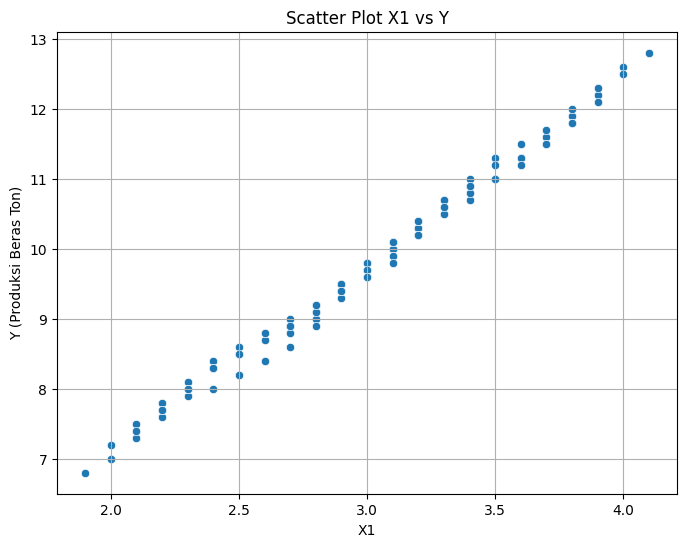

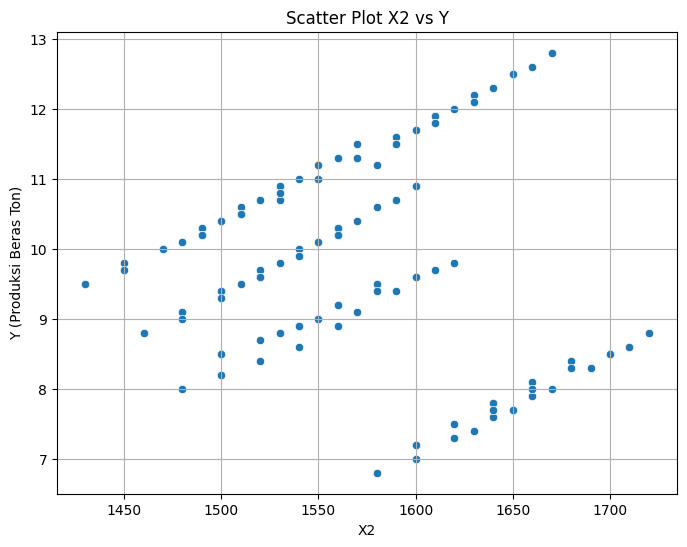

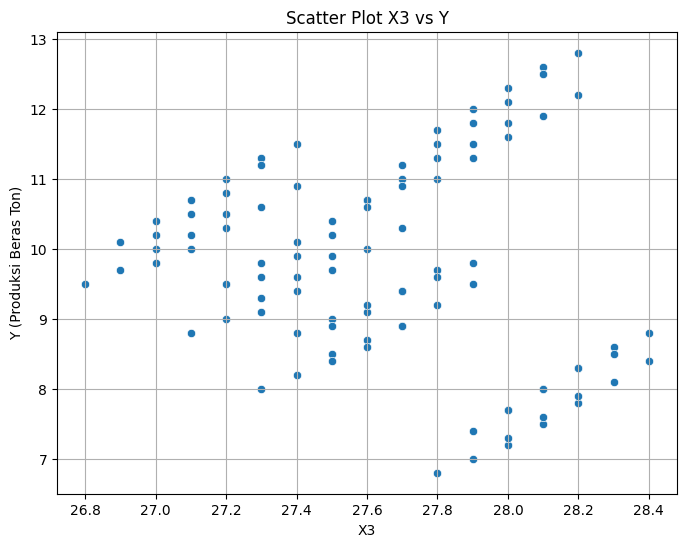

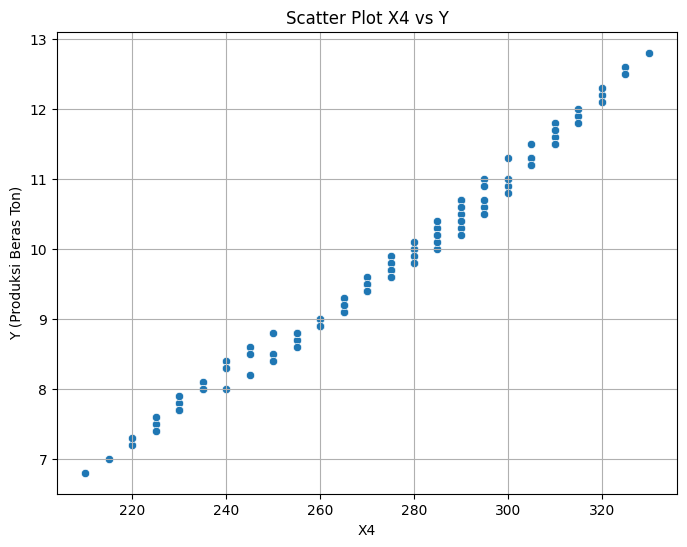

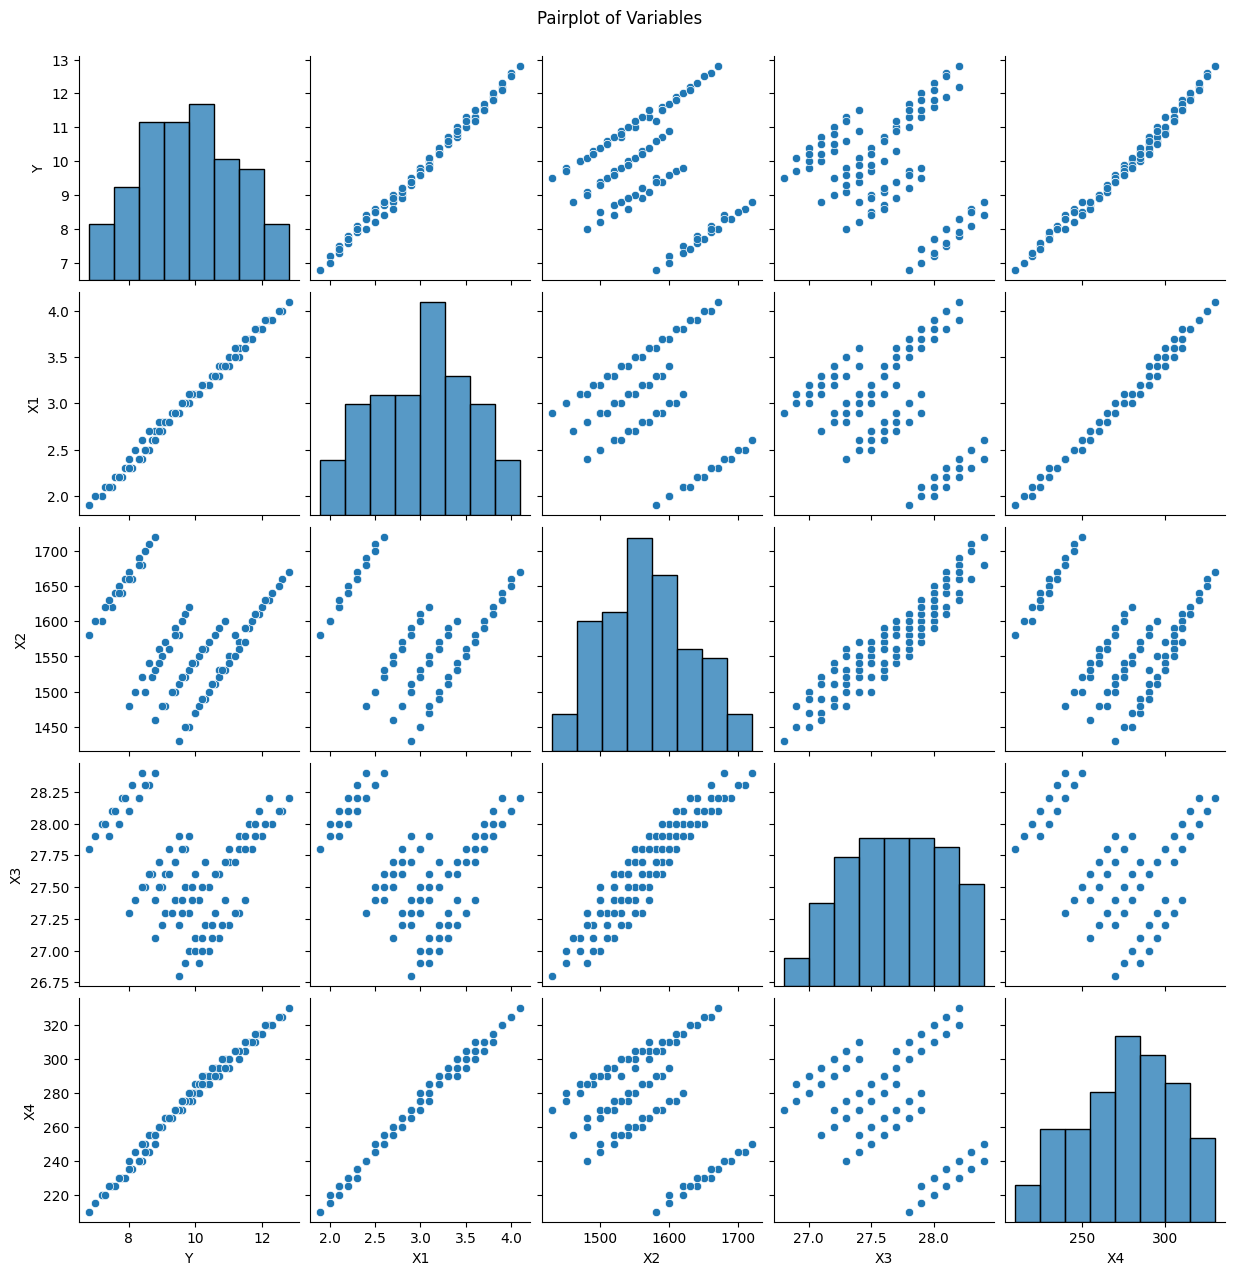

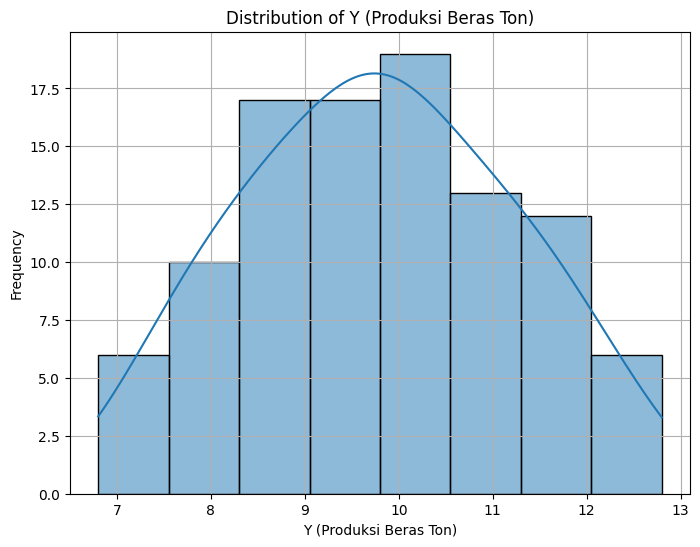

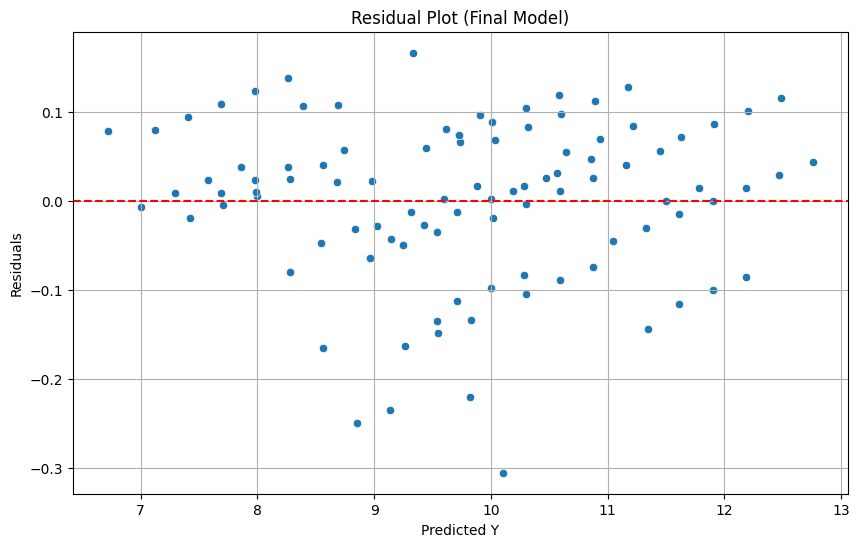

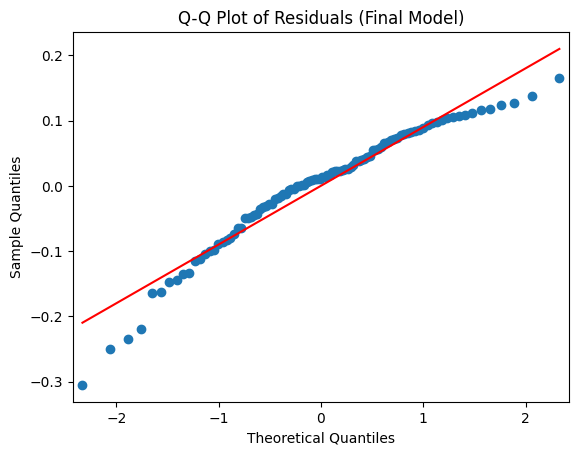

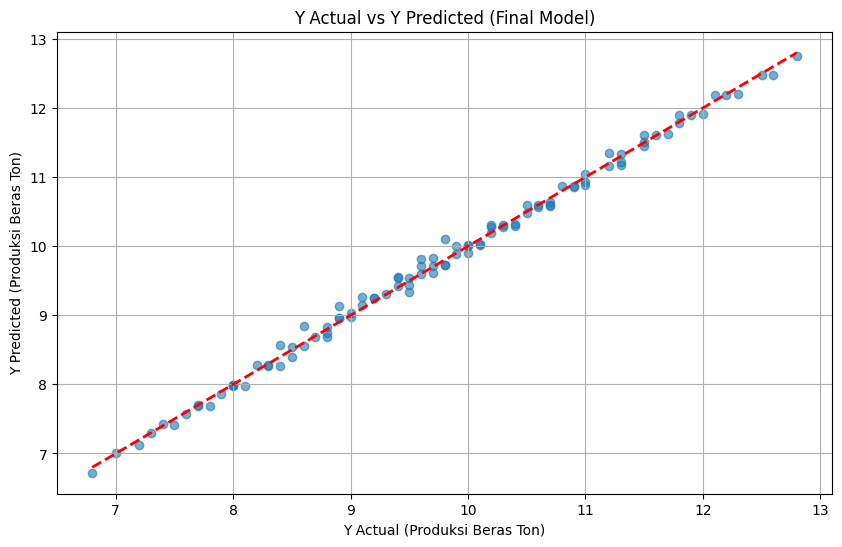

In [21]:
# prompt: coba buatkan hasil visualisasinya

import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi Data
print("\n============== Visualisasi Data ==============")

# Scatter plots of each independent variable vs. the dependent variable
for col in X.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=col, y='Y')
    plt.title(f'Scatter Plot {col} vs Y')
    plt.xlabel(col)
    plt.ylabel('Y (Produksi Beras Ton)')
    plt.grid(True)
    plt.show()

# Pairplot to see relationships between all variables
sns.pairplot(df[['Y'] + list(X.columns)])
plt.suptitle("Pairplot of Variables", y=1.02)
plt.show()

# Distribution of the dependent variable
plt.figure(figsize=(8, 6))
sns.histplot(df['Y'], kde=True)
plt.title('Distribution of Y (Produksi Beras Ton)')
plt.xlabel('Y (Produksi Beras Ton)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


# Residual Plot for the final model (if variables were included)
if included_vars:
    X_final = X[included_vars]
    X_final_b = np.c_[np.ones(X_final.shape[0]), X_final]
    y_pred_final = X_final_b @ final_betas
    residuals = Y - y_pred_final

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_pred_final, y=residuals)
    plt.axhline(0, color='red', linestyle='--')
    plt.title('Residual Plot (Final Model)')
    plt.xlabel('Predicted Y')
    plt.ylabel('Residuals')
    plt.grid(True)
    plt.show()

    # Q-Q plot for residuals to check for normality
    import statsmodels.api as sm
    sm.qqplot(residuals, line='s')
    plt.title('Q-Q Plot of Residuals (Final Model)')
    plt.show()

    # Plot Y Actual vs Y Predicted
    plt.figure(figsize=(10, 6))
    plt.scatter(Y, y_pred_final, alpha=0.6)
    plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'r--', lw=2) # Diagonal line
    plt.title('Y Actual vs Y Predicted (Final Model)')
    plt.xlabel('Y Actual (Produksi Beras Ton)')
    plt.ylabel('Y Predicted (Produksi Beras Ton)')
    plt.grid(True)
    plt.show()



# Analisis Regresi Metode Mundur

In [22]:
# Implementasi Metode Penyisihan Mundur (Backward Elimination)

print("\n============== Mulai Metode Penyisihan Mundur (Backward Elimination) ==============")

# Tingkat signifikansi untuk menyisihkan variabel
alpha_to_remove = 0.05

# Salin data variabel independen
current_X = X.copy()
n = len(Y) # Jumlah observasi

# Loop untuk melakukan penyisihan mundur
while True:
    print(f"\n--- Iterasi Baru: Model saat ini dengan variabel: {current_X.columns.tolist()} ---")

    if current_X.empty:
        print("Tidak ada variabel independen yang tersisa.")
        break

    # Tambahkan kolom konstanta ke matriks X saat ini
    X_with_intercept = np.hstack((np.ones((n, 1)), current_X.values))
    k_current = current_X.shape[1] # Jumlah variabel independen dalam model saat ini

    # Hitung matriks (X'X)^-1 untuk model saat ini
    try:
        XTX_inv_current = np.linalg.inv(X_with_intercept.T @ X_with_intercept)
    except np.linalg.LinAlgError:
        print("Error: Matriks X'X untuk model saat ini tidak memiliki invers. Tidak dapat melanjutkan.")
        break

    # Hitung koefisien regresi (beta) untuk model saat ini
    beta_current = np.linalg.solve(X_with_intercept.T @ X_with_intercept, X_with_intercept.T @ Y)

    # Hitung y_pred untuk model saat ini
    y_pred_current = X_with_intercept @ beta_current

    # Hitung JKT, JKR, JKG untuk model saat ini
    y_bar = Y.mean()
    JKR_current = ((y_pred_current - y_bar)**2).sum()
    JKT_current = ((Y - y_bar)**2).sum() # JKT tetap sama sepanjang proses
    JKG_current = JKT_current - JKR_current

    # Hitung MSE untuk model saat ini
    # Degrees of freedom for error: n - k_current - 1
    df2_current = n - k_current - 1
    if df2_current <= 0:
         print("Error: Degrees of freedom for error non-positif. Tidak dapat menghitung MSE atau F-statistik. Tidak dapat melanjutkan.")
         break
    MSE_current = JKG_current / df2_current
    print(f"MSE model saat ini: {MSE_current:.4f}")


    # Hitung JKR parsial dan F-hitung parsial untuk setiap variabel dalam model saat ini
    # Kita akan menggunakan metode JKR(All) - JKR(All Except One)
    # Alternatif: menggunakan t-statistik dari koefisien dan MSE: F = (b_i_hat)^2 / [MSE * (XTX_inv_current)[i+1][i+1]]
    # Karena kita tidak diizinkan menggunakan library regresi, kita akan menghitung JKR parsial dengan regresi subset.

    jkr_partial_current = {}
    f_hitung_partial_current = {}
    p_value_partial_current = {} # Tambahkan p-value untuk keputusan yang lebih akurat

    print("\nMenghitung JKR Parsial dan F-hitung Parsial untuk setiap variabel dalam model saat ini:")

    for var_name in current_X.columns:
        # Buat subset X tanpa variabel ini
        X_subset = current_X.drop(columns=[var_name])
        X_subset_with_intercept = np.hstack((np.ones((n, 1)), X_subset.values))

        try:
            # Hitung koefisien untuk model tanpa variabel ini
            beta_subset = np.linalg.solve(X_subset_with_intercept.T @ X_subset_with_intercept, X_subset_with_intercept.T @ Y)

            # Hitung y_pred untuk model tanpa variabel ini
            y_pred_subset = X_subset_with_intercept @ beta_subset

            # Hitung JKR untuk model tanpa variabel ini
            jkr_subset = ((y_pred_subset - y_bar)**2).sum()

            # Hitung JKR parsial
            jkr_var = JKR_current - jkr_subset
            jkr_partial_current[var_name] = jkr_var
            print(f"  JKR({var_name} | Other Variables): {jkr_var:.4f}")

            # Hitung F-hitung parsial
            df1_partial = 1 # Kita mengeluarkan 1 variabel
            df2_partial = df2_current # Degrees of freedom error model penuh saat ini
            F_hit = (jkr_var / df1_partial) / MSE_current
            f_hitung_partial_current[var_name] = F_hit
            print(f"  F-hitung Parsial untuk {var_name}: {F_hit:.4f}")

            # Hitung P-value parsial
            p_val = 1 - f.cdf(F_hit, df1_partial, df2_partial)
            p_value_partial_current[var_name] = p_val
            print(f"  P-value Parsial untuk {var_name}: {p_val:.4f}")


        except np.linalg.LinAlgError:
            print(f"  Error: Matriks X'X untuk model tanpa {var_name} tidak memiliki invers.")
            jkr_partial_current[var_name] = np.nan
            f_hitung_partial_current[var_name] = np.nan
            p_value_partial_current[var_name] = np.nan


    # Temukan variabel dengan F-hitung parsial (atau p-value) terkecil
    # Dalam backward elimination, kita mengeluarkan variabel dengan kontribusi terkecil TERDAHULU,
    # yang biasanya dilihat dari p-value terbesar (kurang signifikan) atau F-hitung terkecil.
    # Menggunakan p-value adalah pendekatan standar.

    # Filter variabel yang F-hitung/p-value-nya berhasil dihitung
    valid_p_values = {var: p for var, p in p_value_partial_current.items() if not np.isnan(p)}

    if not valid_p_values:
        print("\nTidak ada F-hitung parsial yang valid dapat dihitung untuk variabel manapun.")
        break # Keluar jika tidak ada variabel yang bisa dievaluasi

    # Cari variabel dengan p-value terbesar di antara yang valid
    variable_to_remove = max(valid_p_values, key=valid_p_values.get)
    max_p_value = valid_p_values[variable_to_remove]

    print(f"\nVariabel dengan P-value Parsial terbesar: {variable_to_remove} (P-value: {max_p_value:.4f})")

    # Bandingkan p-value terbesar dengan alpha
    if max_p_value > alpha_to_remove:
        print(f"P-value Parsial ({max_p_value:.4f}) > alpha ({alpha_to_remove}). Variabel {variable_to_remove} disisihkan.")
        # Sisihkan variabel tersebut dari current_X
        current_X = current_X.drop(columns=[variable_to_remove])
    else:
        print(f"P-value Parsial terbesar ({max_p_value:.4f}) <= alpha ({alpha_to_remove}). Tidak ada variabel yang signifikan untuk dikeluarkan.")
        print("Proses penyisihan mundur selesai.")
        break # Proses selesai jika semua variabel yang tersisa signifikan

# Setelah loop selesai, model terakhir dalam current_X adalah model terbaik menurut metode backward elimination
print("\n============== Hasil Akhir Metode Penyisihan Mundur ==============")
if current_X.empty:
    print("Model terbaik hanya terdiri dari konstanta.")
    # Hitung ulang model akhir hanya dengan konstanta
    beta_final = np.array([Y.mean()])
    print(f"Model Akhir: Y = {beta_final[0]:.4f}")
else:
    print(f"Model terbaik terdiri dari variabel: {current_X.columns.tolist()}")
    # Hitung ulang model akhir dengan variabel yang tersisa
    X_final = np.hstack((np.ones((n, 1)), current_X.values))
    beta_final = np.linalg.solve(X_final.T @ X_final, X_final.T @ Y)

    print("Koefisien Model Akhir:")
    print(f"b_0: {beta_final[0]:.4f}")
    for i, var_name in enumerate(current_X.columns):
        print(f"b_{i+1} ({var_name}): {beta_final[i+1]:.4f}")

    persamaan_final = f"Y = {beta_final[0]:.4f}"
    for i, var_name in enumerate(current_X.columns):
        sign = "+" if beta_final[i+1] >= 0 else "-"
        persamaan_final += f" {sign} {abs(beta_final[i+1]):.4f}*{var_name}"
    print(f"Persamaan Regresi Akhir: {persamaan_final}")

    # Hitung metrik untuk model akhir
    y_pred_final = X_final @ beta_final
    JKT_final = ((Y - y_bar)**2).sum()
    JKR_final = ((y_pred_final - y_bar)**2).sum()
    JKG_final = JKT_final - JKR_final

    print(f"\nJKT Final: {JKT_final:.4f}")
    print(f"JKR Final: {JKR_final:.4f}")
    print(f"JKG Final: {JKG_final:.4f}")

    r_squared_final = JKR_final / JKT_final
    print(f"R-squared Final: {r_squared_final:.4f}")

    k_final = current_X.shape[1]
    df2_final = n - k_final - 1
    if df2_final > 0:
        adjusted_r_squared_final = 1 - ((1 - r_squared_final) * (n - 1) / df2_final)
        print(f"Adjusted R-squared Final: {adjusted_r_squared_final:.4f}")
        MSE_final = JKG_final / df2_final
        print(f"MSE Final: {MSE_final:.4f}")
    else:
        print("Tidak dapat menghitung Adjusted R-squared atau MSE final karena df error <= 0.")



============== Mulai Metode Penyisihan Mundur (Backward Elimination) ==============

--- Iterasi Baru: Model saat ini dengan variabel: ['X1', 'X2', 'X3', 'X4'] ---
MSE model saat ini: 0.0084

Menghitung JKR Parsial dan F-hitung Parsial untuk setiap variabel dalam model saat ini:
  JKR(X1 | Other Variables): 0.4925
  F-hitung Parsial untuk X1: 58.9664
  P-value Parsial untuk X1: 0.0000
  JKR(X2 | Other Variables): 0.1674
  F-hitung Parsial untuk X2: 20.0398
  P-value Parsial untuk X2: 0.0000
  JKR(X3 | Other Variables): 0.0170
  F-hitung Parsial untuk X3: 2.0314
  P-value Parsial untuk X3: 0.1574
  JKR(X4 | Other Variables): 0.2310
  F-hitung Parsial untuk X4: 27.6549
  P-value Parsial untuk X4: 0.0000

Variabel dengan P-value Parsial terbesar: X3 (P-value: 0.1574)
P-value Parsial (0.1574) > alpha (0.05). Variabel X3 disisihkan.

--- Iterasi Baru: Model saat ini dengan variabel: ['X1', 'X2', 'X4'] ---
MSE model saat ini: 0.0084

Menghitung JKR Parsial dan F-hitung Parsial untuk setiap 

# Analisis Regresi Metode Bertahap

In [ ]:
print("\n============== Menghitung R^2 per Variabel Independen (X1-X4) ==============")

# R^2 for X1
model_X1 = np.linalg.solve(np.array([[n, jumlah_x1], [jumlah_x1, jumlah_x1_kuadrat]]), np.array([jumlah_y, jumlah_x1_y]))
y_pred_X1 = model_X1[0] + model_X1[1] * df['X1']
JKR_X1 = ((y_pred_X1 - y_bar)**2).sum()
r_squared_X1 = JKR_X1 / JKT
print(f"R-squared untuk X1: {r_squared_X1:.4f}")

# R^2 for X2
model_X2 = np.linalg.solve(np.array([[n, jumlah_x2], [jumlah_x2, jumlah_x2_kuadrat]]), np.array([jumlah_y, jumlah_x2_y]))
y_pred_X2 = model_X2[0] + model_X2[1] * df['X2']
JKR_X2 = ((y_pred_X2 - y_bar)**2).sum()
r_squared_X2 = JKR_X2 / JKT
print(f"R-squared untuk X2: {r_squared_X2:.4f}")

# R^2 for X3
model_X3 = np.linalg.solve(np.array([[n, jumlah_x3], [jumlah_x3, jumlah_x3_kuadrat]]), np.array([jumlah_y, jumlah_x3_y]))
y_pred_X3 = model_X3[0] + model_X3[1] * df['X3']
JKR_X3 = ((y_pred_X3 - y_bar)**2).sum()
r_squared_X3 = JKR_X3 / JKT
print(f"R-squared untuk X3: {r_squared_X3:.4f}")

# R^2 for X4
model_X4 = np.linalg.solve(np.array([[n, jumlah_x4], [jumlah_x4, jumlah_x4_kuadrat]]), np.array([jumlah_y, jumlah_x4_y]))
y_pred_X4 = model_X4[0] + model_X4[1] * df['X4']
JKR_X4 = ((y_pred_X4 - y_bar)**2).sum()
r_squared_X4 = JKR_X4 / JKT
print(f"R-squared untuk X4: {r_squared_X4:.4f}")



============== Menghitung R^2 per Variabel Independen (X1-X4) ==============
R-squared untuk X1: 0.9926
R-squared untuk X2: 0.0051
R-squared untuk X3: 0.0155
R-squared untuk X4: 0.9858


In [ ]:
# prompt: R squared X1 lebih besar dari yang lain, maka dari itu cari Fhitung dan Ftabel dari X1 dengan R squared segitu, dan s^2 X1

print("\n============== Analisis Khusus X1 ==============")

print(f"R-squared untuk X1: {r_squared_X1:.4f}")

# Derajat kebebasan untuk F-hitung X1: df1 = 1 (karena hanya 1 prediktor), df2 = n - 1 - 1 = n - 2
k_X1 = 1
df1_X1 = k_X1
df2_X1 = n - k_X1 - 1

# Menghitung JKG untuk model dengan hanya X1
JKG_X1 = JKT - JKR_X1
print(f"JKG untuk model dengan X1: {JKG_X1:.4f}")

# Menghitung s^2 untuk model dengan hanya X1
s_kuadrat_X1 = JKG_X1 / df2_X1
print(f"Estimasi Varians Error (s^2) untuk model dengan X1: {s_kuadrat_X1:.4f}")


# Menghitung F-hitung untuk X1
F_hitung_X1 = (JKR_X1 / df1_X1) / (JKG_X1 / df2_X1)
print(f"F-hitung untuk X1: {F_hitung_X1:.4f}")

# Menghitung F-tabel untuk X1
alpha = 0.05
F_tabel_X1 = f.ppf(1 - alpha, df1_X1, df2_X1)
print(f"F-tabel (alpha={alpha}, df1={df1_X1}, df2={df2_X1}) untuk X1: {F_tabel_X1:.4f}")

# Analisis hasil F-test untuk X1
print("\n============== Analisis Hasil F-test untuk X1 ==============")
if F_hitung_X1 > F_tabel_X1:
    print(f"F-hitung X1 ({F_hitung_X1:.4f}) > F-tabel X1 ({F_tabel_X1:.4f}).")
    print("Tolak H0: X1 berpengaruh signifikan terhadap variabel dependen.")
else:
    print(f"F-hitung X1 ({F_hitung_X1:.4f}) <= F-tabel X1 ({F_tabel_X1:.4f}).")
    print("Gagal tolak H0: X1 tidak berpengaruh signifikan terhadap variabel dependen.")



============== Analisis Khusus X1 ==============
R-squared untuk X1: 0.9926
JKG untuk model dengan X1: 1.4870
Estimasi Varians Error (s^2) untuk model dengan X1: 0.0152
F-hitung untuk X1: 13217.5494
F-tabel (alpha=0.05, df1=1, df2=98) untuk X1: 3.9381

============== Analisis Hasil F-test untuk X1 ==============
F-hitung X1 (13217.5494) > F-tabel X1 (3.9381).
Tolak H0: X1 berpengaruh signifikan terhadap variabel dependen.


In [ ]:
# Mencocokkan persamaan regresi yang mengandung X1: (X1,X2), (X1,X3), dan (X1,X4)
print("\n============== Mencari R^2 untuk model (X1, X2), (X1, X3), dan (X1, X4) setelah X1 masuk model ==============")

# === Model (X1, X2) ===
# Matriks A dan vektor b untuk model Y = b0 + b1*X1 + b2*X2
A_X1X2 = np.array([
    [n, jumlah_x1, jumlah_x2],
    [jumlah_x1, jumlah_x1_kuadrat, jumlah_x1_x2],
    [jumlah_x2, jumlah_x1_x2, jumlah_x2_kuadrat]
])
b_X1X2 = np.array([jumlah_y, jumlah_x1_y, jumlah_x2_y])

try:
    # Menyelesaikan SPL untuk mencari b0, b1, b2
    beta_X1X2 = np.linalg.solve(A_X1X2, b_X1X2)
    b0_X1X2, b1_X1X2, b2_X1X2 = beta_X1X2

    # Menghitung y_pred untuk model (X1, X2)
    y_pred_X1X2 = b0_X1X2 + b1_X1X2 * df['X1'] + b2_X1X2 * df['X2']

    # Menghitung JKR dan R^2 untuk model (X1, X2)
    JKR_X1X2 = ((y_pred_X1X2 - y_bar)**2).sum()
    r_squared_X1X2 = JKR_X1X2 / JKT
    print(f"R-squared untuk model (X1, X2): {r_squared_X1X2:.4f}")

except np.linalg.LinAlgError:
    print("Error: Matriks koefisien untuk model (X1, X2) tidak memiliki invers.")

# === Model (X1, X3) ===
# Matriks A dan vektor b untuk model Y = b0 + b1*X1 + b3*X3
A_X1X3 = np.array([
    [n, jumlah_x1, jumlah_x3],
    [jumlah_x1, jumlah_x1_kuadrat, jumlah_x1_x3],
    [jumlah_x3, jumlah_x1_x3, jumlah_x3_kuadrat]
])
b_X1X3 = np.array([jumlah_y, jumlah_x1_y, jumlah_x3_y])

try:
    # Menyelesaikan SPL untuk mencari b0, b1, b3
    beta_X1X3 = np.linalg.solve(A_X1X3, b_X1X3)
    b0_X1X3, b1_X1X3, b3_X1X3 = beta_X1X3

    # Menghitung y_pred untuk model (X1, X3)
    y_pred_X1X3 = b0_X1X3 + b1_X1X3 * df['X1'] + b3_X1X3 * df['X3']

    # Menghitung JKR dan R^2 untuk model (X1, X3)
    JKR_X1X3 = ((y_pred_X1X3 - y_bar)**2).sum()
    r_squared_X1X3 = JKR_X1X3 / JKT
    print(f"R-squared untuk model (X1, X3): {r_squared_X1X3:.4f}")

except np.linalg.LinAlgError:
    print("Error: Matriks koefisien untuk model (X1, X3) tidak memiliki invers.")


# === Model (X1, X4) ===
# Matriks A dan vektor b untuk model Y = b0 + b1*X1 + b4*X4
A_X1X4 = np.array([
    [n, jumlah_x1, jumlah_x4],
    [jumlah_x1, jumlah_x1_kuadrat, jumlah_x1_x4],
    [jumlah_x4, jumlah_x1_x4, jumlah_x4_kuadrat]
])
b_X1X4 = np.array([jumlah_y, jumlah_x1_y, jumlah_x4_y])

try:
    # Menyelesaikan SPL untuk mencari b0, b1, b4
    beta_X1X4 = np.linalg.solve(A_X1X4, b_X1X4)
    b0_X1X4, b1_X1X4, b4_X1X4 = beta_X1X4

    # Menghitung y_pred untuk model (X1, X4)
    y_pred_X1X4 = b0_X1X4 + b1_X1X4 * df['X1'] + b4_X1X4 * df['X4']

    # Menghitung JKR dan R^2 untuk model (X1, X4)
    JKR_X1X4 = ((y_pred_X1X4 - y_bar)**2).sum()
    r_squared_X1X4 = JKR_X1X4 / JKT
    print(f"R-squared untuk model (X1, X4): {r_squared_X1X4:.4f}")

except np.linalg.LinAlgError:
    print("Error: Matriks koefisien untuk model (X1, X4) tidak memiliki invers.")


============== Mencari R^2 untuk model (X1, X2), (X1, X3), dan (X1, X4) setelah X1 masuk model ==============
R-squared untuk model (X1, X2): 0.9940
R-squared untuk model (X1, X3): 0.9932
R-squared untuk model (X1, X4): 0.9931


In [ ]:
# Analisis untuk peubah X2 ketika X1 sudah ada dalam model
print("\n============== Analisis untuk X2 ketika X1 sudah ada dalam model ==============")

# JKR(X1, X2) - JKR(X1) memberikan jumlah kuadrat regresi tambahan yang dijelaskan oleh X2 ketika X1 sudah ada.
JKR_tambahan_X2_setelah_X1 = JKR_X1X2 - JKR_X1
print(f"JKR X2 setelah X1 masuk model: {JKR_tambahan_X2_setelah_X1:.4f}")

# JKG untuk model dengan (X1, X2)
JKG_X1X2 = JKT - JKR_X1X2
print(f"JKG untuk model (X1, X2): {JKG_X1X2:.4f}")

# Estimasi varians error (s^2) untuk model dengan (X1, X2)
# df2 = n - k - 1, dengan k=2 (X1 dan X2)
k_X1X2 = 2
df2_X1X2 = n - k_X1X2 - 1
s_kuadrat_X1X2 = JKG_X1X2 / df2_X1X2
print(f"Estimasi Varians Error (s^2) untuk model (X1, X2): {s_kuadrat_X1X2:.4f}")

# Menghitung F-hitung untuk menguji signifikansi penambahan X2 setelah X1
# F-hitung = [JKR(X1, X2) - JKR(X1)] / s^2(X1, X2)
# df1 = jumlah peubah tambahan = 1 (X2)
# df2 = df2 untuk model yang lebih besar (X1, X2) = n - k_X1X2 - 1
F_hitung_X2_setelah_X1 = (JKR_tambahan_X2_setelah_X1 / 1) / s_kuadrat_X1X2
print(f"F-hitung untuk X2 setelah X1 masuk model: {F_hitung_X2_setelah_X1:.4f}")

# Menghitung F-tabel untuk menguji signifikansi penambahan X2
alpha = 0.05
df1_F_X2 = 1  # Menambahkan 1 variabel (X2)
df2_F_X2 = n - k_X1X2 - 1 # Derajat kebebasan error untuk model yang lebih besar
F_tabel_X2_setelah_X1 = f.ppf(1 - alpha, df1_F_X2, df2_F_X2)
print(f"F-tabel (alpha={alpha}, df1={df1_F_X2}, df2={df2_F_X2}) untuk X2 setelah X1: {F_tabel_X2_setelah_X1:.4f}")

# Analisis hasil F-test untuk X2 setelah X1
print("\n============== Analisis Hasil F-test untuk X2 setelah X1 ==============")
if F_hitung_X2_setelah_X1 > F_tabel_X2_setelah_X1:
    print(f"F-hitung X2 setelah X1 ({F_hitung_X2_setelah_X1:.4f}) > F-tabel ({F_tabel_X2_setelah_X1:.4f}).")
    print("Tolak H0: X2 memberikan kontribusi signifikan terhadap model regresi ketika X1 sudah ada.")
else:
    print(f"F-hitung X2 setelah X1 ({F_hitung_X2_setelah_X1:.4f}) <= F-tabel ({F_tabel_X2_setelah_X1:.4f}).")
    print("Gagal tolak H0: X2 tidak memberikan kontribusi signifikan terhadap model regresi ketika X1 sudah ada.")




============== Analisis untuk X2 ketika X1 sudah ada dalam model ==============
JKR X2 setelah X1 masuk model: 0.2786
JKG untuk model (X1, X2): 1.2085
Estimasi Varians Error (s^2) untuk model (X1, X2): 0.0125
F-hitung untuk X2 setelah X1 masuk model: 22.3586
F-tabel (alpha=0.05, df1=1, df2=97) untuk X2 setelah X1: 3.9391

============== Analisis Hasil F-test untuk X2 setelah X1 ==============
F-hitung X2 setelah X1 (22.3586) > F-tabel (3.9391).
Tolak H0: X2 memberikan kontribusi signifikan terhadap model regresi ketika X1 sudah ada.


In [ ]:
# Untuk menguji apakah peubah X1 masih berarti dalam model jika X2 ada didalam model,
# perlu membandingkan R-squared dari model dengan hanya X2 (Y ~ X2) dengan
# R-squared dari model dengan X1 dan X2 (Y ~ X1 + X2).
# R-squared dari model (Y ~ X2) sudah dihitung sebelumnya sebagai r_squared_X2.
# R-squared dari model (Y ~ X1 + X2) sudah dihitung sebelumnya sebagai r_squared_X1X2.

print("\n============== R-squared ketika X1 dan X2 ada didalam model ==============")
print(f"R-squared untuk model (X1, X2): {r_squared_X1X2:.4f}")

print("\n============== Perbandingan R-squared ==============")
print(f"R-squared untuk model (Y ~ X2) saja: {r_squared_X2:.4f}")
print(f"R-squared untuk model (Y ~ X1 + X2): {r_squared_X1X2:.4f}")

# Perubahan R-squared ketika X1 ditambahkan ke model yang sudah mengandung X2
delta_r_squared = r_squared_X1X2 - r_squared_X2
print(f"Perubahan R-squared ketika X1 ditambahkan setelah X2: {delta_r_squared:.4f}")

# Meskipun R-squared dari model (X1, X2) lebih besar dari R-squared model (X2),
# menguji signifikansi statistik kontribusi X1 ketika X2 sudah ada,
# menghitung F-hitung untuk penambahan X1 setelah X2.

# JKR(X1, X2) - JKR(X2) memberikan jumlah kuadrat regresi tambahan yang dijelaskan oleh X1 ketika X2 sudah ada.
JKR_tambahan_X1_setelah_X2 = JKR_X1X2 - JKR_X2
print(f"JKR X1 setelah X2 masuk model: {JKR_tambahan_X1_setelah_X2:.4f}")

# JKG untuk model dengan (X1, X2) sudah dihitung sebelumnya
# JKG_X1X2

# Estimasi varians error (s^2) untuk model dengan (X1, X2) sudah dihitung sebelumnya
# s_kuadrat_X1X2

# Menghitung F-hitung untuk menguji signifikansi penambahan X1 setelah X2
# F-hitung = [JKR(X1, X2) - JKR(X2)] / s^2(X1, X2)
# df1 = jumlah peubah tambahan = 1 (X1)
# df2 = df2 untuk model yang lebih besar (X1, X2) = n - k_X1X2 - 1
F_hitung_X1_setelah_X2 = (JKR_tambahan_X1_setelah_X2 / 1) / s_kuadrat_X1X2
print(f"F-hitung untuk X1 setelah X2 masuk model: {F_hitung_X1_setelah_X2:.4f}")

# Menghitung F-tabel untuk menguji signifikansi penambahan X1
alpha = 0.05
df1_F_X1_after_X2 = 1  # Menambahkan 1 variabel (X1)
df2_F_X1_after_X2 = n - k_X1X2 - 1 # Derajat kebebasan error untuk model yang lebih besar
F_tabel_X1_setelah_X2 = f.ppf(1 - alpha, df1_F_X1_after_X2, df2_F_X1_after_X2)
print(f"F-tabel (alpha={alpha}, df1={df1_F_X1_after_X2}, df2={df2_F_X1_after_X2}) untuk X1 setelah X2: {F_tabel_X1_setelah_X2:.4f}")

# Analisis hasil F-test untuk X1 setelah X2
print("\n============== Analisis Hasil F-test untuk X1 setelah X2 ==============")
if F_hitung_X1_setelah_X2 > F_tabel_X1_setelah_X2:
    print(f"F-hitung X1 setelah X2 ({F_hitung_X1_setelah_X2:.4f}) > F-tabel ({F_tabel_X1_setelah_X2:.4f}).")
    print("Tolak H0: X1 memberikan kontribusi signifikan terhadap model regresi ketika X2 sudah ada.")
    print("Jadi, peubah X1 masih berarti dalam model jika X2 ada di dalam model.")
else:
    print(f"F-hitung X1 setelah X2 ({F_hitung_X1_setelah_X2:.4f}) <= F-tabel ({F_tabel_X1_setelah_X2:.4f}).")
    print("Gagal tolak H0: X1 tidak memberikan kontribusi signifikan terhadap model regresi ketika X2 sudah ada.")
    print("Jadi, peubah X1 tidak lagi berarti dalam model jika X2 ada di dalam model.")



============== R-squared ketika X1 dan X2 ada didalam model ==============
R-squared untuk model (X1, X2): 0.9940

============== Perbandingan R-squared ==============
R-squared untuk model (Y ~ X2) saja: 0.0051
R-squared untuk model (Y ~ X1 + X2): 0.9940
Perubahan R-squared ketika X1 ditambahkan setelah X2: 0.9890
JKR X1 setelah X2 masuk model: 199.8165
F-hitung untuk X1 setelah X2 masuk model: 16038.5345
F-tabel (alpha=0.05, df1=1, df2=97) untuk X1 setelah X2: 3.9391

============== Analisis Hasil F-test untuk X1 setelah X2 ==============
F-hitung X1 setelah X2 (16038.5345) > F-tabel (3.9391).
Tolak H0: X1 memberikan kontribusi signifikan terhadap model regresi ketika X2 sudah ada.
Jadi, peubah X1 masih berarti dalam model jika X2 ada di dalam model.


In [ ]:
# prompt: Setelah mencari R squared X1|X2 dan masih berarti didalam model, sehingga untuk model regresi dengan memasukkan peubah X3 menghasilkan nilai S^2 baru. dan hitung juga Fhitung dan Ftable untuk R(B3|B1,B2)/s^2

# Model Regresi dengan X1, X2, dan X3
print("\n============== Model Regresi dengan X1, X2, dan X3 ==============")

# Matriks A dan vektor b untuk model Y = b0 + b1*X1 + b2*X2 + b3*X3
A_X1X2X3 = np.array([
    [n, jumlah_x1, jumlah_x2, jumlah_x3],
    [jumlah_x1, jumlah_x1_kuadrat, jumlah_x1_x2, jumlah_x1_x3],
    [jumlah_x2, jumlah_x1_x2, jumlah_x2_kuadrat, jumlah_x2_x3],
    [jumlah_x3, jumlah_x1_x3, jumlah_x2_x3, jumlah_x3_kuadrat]
])
b_X1X2X3 = np.array([jumlah_y, jumlah_x1_y, jumlah_x2_y, jumlah_x3_y])

try:
    # Menyelesaikan SPL untuk mencari b0, b1, b2, b3
    beta_X1X2X3 = np.linalg.solve(A_X1X2X3, b_X1X2X3)
    b0_X1X2X3, b1_X1X2X3, b2_X1X2X3, b3_X1X2X3 = beta_X1X2X3

    print("\n============== Penyelesaian SPL (Nilai b_i) untuk model (X1, X2, X3) ==============")
    print(f"Nilai b_0: {b0_X1X2X3:.4f}")
    print(f"Nilai b_1: {b1_X1X2X3:.4f}")
    print(f"Nilai b_2: {b2_X1X2X3:.4f}")
    print(f"Nilai b_3: {b3_X1X2X3:.4f}")

    print("\n============== Persamaan Regresi (X1, X2, X3) ==============")
    print(f"Y = {b0_X1X2X3:.4f} + {b1_X1X2X3:.4f}*X1 + {b2_X1X2X3:.4f}*X2 + {b3_X1X2X3:.4f}*X3")

    # Menghitung y_pred untuk model (X1, X2, X3)
    y_pred_X1X2X3 = b0_X1X2X3 + b1_X1X2X3 * df['X1'] + b2_X1X2X3 * df['X2'] + b3_X1X2X3 * df['X3']

    # Menghitung JKR dan JKG untuk model (X1, X2, X3)
    JKR_X1X2X3 = ((y_pred_X1X2X3 - y_bar)**2).sum()
    JKG_X1X2X3 = JKT - JKR_X1X2X3
    print(f"\nJKR untuk model (X1, X2, X3): {JKR_X1X2X3:.4f}")
    print(f"JKG untuk model (X1, X2, X3): {JKG_X1X2X3:.4f}")


    # Menghitung R-squared untuk model (X1, X2, X3)
    r_squared_X1X2X3 = JKR_X1X2X3 / JKT
    print(f"\nR-squared untuk model (X1, X2, X3): {r_squared_X1X2X3:.4f}")

    # Menghitung s^2 baru untuk model regresi dengan memasukkan peubah X3 (setelah X1 dan X2 ada)
    # df2 = n - k - 1, dengan k=3 (X1, X2, dan X3)
    k_X1X2X3 = 3
    df2_X1X2X3 = n - k_X1X2X3 - 1
    s_kuadrat_X1X2X3 = JKG_X1X2X3 / df2_X1X2X3
    print(f"\nEstimasi Varians Error (s^2) baru untuk model (X1, X2, X3): {s_kuadrat_X1X2X3:.4f}")

    # Menghitung F-hitung untuk menguji R(B3|B1,B2)/s^2
    # Ini adalah uji signifikansi penambahan X3 ke model yang sudah mengandung X1 dan X2
    # Numerator: JKR(X1, X2, X3) - JKR(X1, X2) -> Sum of Squares Regression yang dijelaskan oleh X3 setelah X1 dan X2
    # Denominator: s^2(X1, X2, X3) -> Estimasi varians error untuk model yang lebih besar (X1, X2, X3)
    # JKR(X1, X2) sudah dihitung sebelumnya sebagai JKR_X1X2

    JKR_tambahan_X3_setelah_X1X2 = JKR_X1X2X3 - JKR_X1X2
    print(f"JKR X3 setelah X1 dan X2 masuk model: {JKR_tambahan_X3_setelah_X1X2:.4f}")


    # F-hitung = [JKR(X1, X2, X3) - JKR(X1, X2)] / s^2(X1, X2, X3)
    # df1 = jumlah peubah tambahan = 1 (X3)
    # df2 = df2 untuk model yang lebih besar (X1, X2, X3) = n - k_X1X2X3 - 1
    F_hitung_B3_setelah_B1B2 = (JKR_tambahan_X3_setelah_X1X2 / 1) / s_kuadrat_X1X2X3
    print(f"\nF-hitung untuk R(B3|B1,B2)/s^2 (uji penambahan X3 setelah X1 dan X2): {F_hitung_B3_setelah_B1B2:.4f}")

    # Menghitung F-tabel untuk uji penambahan X3
    alpha = 0.05
    df1_F_B3 = 1  # Menambahkan 1 variabel (X3)
    df2_F_B3 = n - k_X1X2X3 - 1 # Derajat kebebasan error untuk model yang lebih besar
    F_tabel_B3_setelah_B1B2 = f.ppf(1 - alpha, df1_F_B3, df2_F_B3)
    print(f"F-tabel (alpha={alpha}, df1={df1_F_B3}, df2={df2_F_B3}) untuk uji penambahan X3: {F_tabel_B3_setelah_B1B2:.4f}")

    # Analisis hasil F-test untuk penambahan X3
    print("\n============== Analisis Hasil F-test untuk Penambahan X3 Setelah X1 dan X2 ==============")
    if F_hitung_B3_setelah_B1B2 > F_tabel_B3_setelah_B1B2:
        print(f"F-hitung ({F_hitung_B3_setelah_B1B2:.4f}) > F-tabel ({F_tabel_B3_setelah_B1B2:.4f}).")
        print("Tolak H0: X3 memberikan kontribusi signifikan terhadap model regresi ketika X1 dan X2 sudah ada.")
        print("Sehingga, X3 layak dimasukkan ke dalam model.")
    else:
        print(f"F-hitung ({F_hitung_B3_setelah_B1B2:.4f}) <= F-tabel ({F_tabel_B3_setelah_B1B2:.4f}).")
        print("Gagal tolak H0: X3 tidak memberikan kontribusi signifikan terhadap model regresi ketika X1 dan X2 sudah ada.")
        print("Sehingga, X3 tidak layak dimasukkan ke dalam model.")

except np.linalg.LinAlgError:
    print("\nError: Matriks koefisien untuk model (X1, X2, X3) tidak memiliki invers.")




============== Model Regresi dengan X1, X2, dan X3 ==============

============== Penyelesaian SPL (Nilai b_i) untuk model (X1, X2, X3) ==============
Nilai b_0: 6.4122
Nilai b_1: 2.6623
Nilai b_2: 0.0026
Nilai b_3: -0.3151

============== Persamaan Regresi (X1, X2, X3) ==============
Y = 6.4122 + 2.6623*X1 + 0.0026*X2 + -0.3151*X3

JKR untuk model (X1, X2, X3): 201.0230
JKG untuk model (X1, X2, X3): 1.0245

R-squared untuk model (X1, X2, X3): 0.9949

Estimasi Varians Error (s^2) baru untuk model (X1, X2, X3): 0.0107
JKR X3 setelah X1 dan X2 masuk model: 0.1840

F-hitung untuk R(B3|B1,B2)/s^2 (uji penambahan X3 setelah X1 dan X2): 17.2380
F-tabel (alpha=0.05, df1=1, df2=96) untuk uji penambahan X3: 3.9402

============== Analisis Hasil F-test untuk Penambahan X3 Setelah X1 dan X2 ==============
F-hitung (17.2380) > F-tabel (3.9402).
Tolak H0: X3 memberikan kontribusi signifikan terhadap model regresi ketika X1 dan X2 sudah ada.
Sehingga, X3 layak dimasukkan ke dalam model.


In [ ]:
# prompt: Kemudian ujilah apakah peubah X1,x2 masih berarti dalam model jika X3 ada didalam model. diperoleh jumlah kudrat regresi R(B3|B1,B2)

# Untuk menguji apakah peubah X1, X2 masih berarti dalam model jika X3 ada didalam model,
# kita perlu menguji signifikansi koefisien beta (b_i) masing-masing peubah
# dalam model yang sudah mengandung X1, X2, dan X3 (Y = b0 + b1*X1 + b2*X2 + b3*X3).
# Jika p-value (atau F-hitung / T-hitung) untuk b1 dan b2 kurang dari alpha (misalnya 0.05),
# maka peubah X1 dan X2 masih berarti dalam model meskipun X3 ada.

# Kita perlu menghitung matriks (X'X)^-1 untuk model Y = b0 + b1*X1 + b2*X2 + b3*X3
# Matriks X untuk model ini akan berukuran n x 4 (kolom konstanta, X1, X2, X3)
X_X1X2X3 = np.column_stack((np.ones(n), df['X1'], df['X2'], df['X3']))

# Hitung (X'X)
XtX_X1X2X3 = X_X1X2X3.T @ X_X1X2X3

# Hitung invers dari (X'X)
try:
    XtX_inv_X1X2X3 = np.linalg.inv(XtX_X1X2X3)

    print("\n============== Matriks (X'X)^-1 untuk model (X1, X2, X3) ==============")
    print(XtX_inv_X1X2X3)

    # Estimasi varians error (s^2) untuk model (X1, X2, X3) sudah dihitung sebelumnya
    # s_kuadrat_X1X2X3

    # Menghitung standar error untuk koefisien b1 dan b2
    # Se(bi) = sqrt(s^2 * diagonal_element_of_(X'X)^-1 for bi)
    se_b1 = np.sqrt(s_kuadrat_X1X2X3 * XtX_inv_X1X2X3[1, 1]) # elemen diagonal untuk X1 (indeks 1)
    se_b2 = np.sqrt(s_kuadrat_X1X2X3 * XtX_inv_X1X2X3[2, 2]) # elemen diagonal untuk X2 (indeks 2)

    print(f"\nStandard Error untuk b1 (X1): {se_b1:.4f}")
    print(f"Standard Error untuk b2 (X2): {se_b2:.4f}")


    # Menghitung nilai T-hitung untuk koefisien b1 dan b2
    # T-hitung = bi / Se(bi)
    T_hitung_b1 = beta_X1X2X3[1] / se_b1
    T_hitung_b2 = beta_X1X2X3[2] / se_b2

    print(f"\nT-hitung untuk b1 (X1): {T_hitung_b1:.4f}")
    print(f"T-hitung untuk b2 (X2): {T_hitung_b2:.4f}")

    # Menghitung nilai T-tabel untuk uji dua arah
    alpha = 0.05
    df_error = n - k_X1X2X3 - 1 # Derajat kebebasan error untuk model (X1, X2, X3)
    # Karena uji dua arah, alpha dibagi 2
    T_tabel = f.ppf(1 - alpha/2, 1, df_error) # Menggunakan F-tabel dengan df1=1 untuk ekivalensi dengan T^2

    # Jika menggunakan T-tabel langsung (scipy.stats.t.ppf):
    # from scipy.stats import t
    # T_tabel = t.ppf(1 - alpha/2, df_error)

    print(f"T-tabel (alpha={alpha}, df_error={df_error}) untuk uji dua arah: {T_tabel:.4f}")


    # Analisis signifikansi b1 (X1) ketika X2 dan X3 ada dalam model
    print("\n============== Analisis Signifikansi X1 (b1) ketika X2 dan X3 ada dalam model ==============")
    if abs(T_hitung_b1) > T_tabel:
        print(f"|T-hitung b1 ({abs(T_hitung_b1):.4f})| > T-tabel ({T_tabel:.4f}).")
        print("Tolak H0 (b1=0): Koefisien b1 (X1) signifikan secara statistik.")
        print("Jadi, peubah X1 masih berarti dalam model jika X2 dan X3 ada di dalam model.")
    else:
        print(f"|T-hitung b1 ({abs(T_hitung_b1):.4f})| <= T-tabel ({T_tabel:.4f}).")
        print("Gagal tolak H0 (b1=0): Koefisien b1 (X1) tidak signifikan secara statistik.")
        print("Jadi, peubah X1 tidak lagi berarti dalam model jika X2 dan X3 ada di dalam model.")

    # Analisis signifikansi b2 (X2) ketika X1 dan X3 ada dalam model
    print("\n============== Analisis Signifikansi X2 (b2) ketika X1 dan X3 ada dalam model ==============")
    if abs(T_hitung_b2) > T_tabel:
        print(f"|T-hitung b2 ({abs(T_hitung_b2):.4f})| > T-tabel ({T_tabel:.4f}).")
        print("Tolak H0 (b2=0): Koefisien b2 (X2) signifikan secara statistik.")
        print("Jadi, peubah X2 masih berarti dalam model jika X1 dan X3 ada di dalam model.")
    else:
        print(f"|T-hitung b2 ({abs(T_hitung_b2):.4f})| <= T-tabel ({T_tabel:.4f}).")
        print("Gagal tolak H0 (b2=0): Koefisien b2 (X2) tidak signifikan secara statistik.")
        print("Jadi, peubah X2 tidak lagi berarti dalam model jika X1 dan X3 ada di dalam model.")

except np.linalg.LinAlgError:
    print("\nError: Matriks (X'X) untuk model (X1, X2, X3) tidak memiliki invers. Tidak dapat menghitung standar error koefisien.")

# Jumlah Kuadrat Regresi parsial R(B3 | B1, B2)
# Ini adalah JKR tambahan yang dijelaskan oleh X3 ketika X1 dan X2 sudah ada dalam model.
# Ini sudah dihitung sebelumnya: JKR_tambahan_X3_setelah_X1X2 = JKR_X1X2X3 - JKR_X1X2
# Ini juga merupakan numerator dari F-hitung untuk menguji signifikansi X3 secara parsial.

print("\n============== Jumlah Kuadrat Regresi Parsial R(B3 | B1, B2) ==============")
# Kita sudah menghitungnya di langkah sebelumnya
# JKR_tambahan_X3_setelah_X1X2 = JKR_X1X2X3 - JKR_X1X2
print(f"Jumlah Kuadrat Regresi R(B3 | B1, B2): {JKR_tambahan_X3_setelah_X1X2:.4f}")



============== Matriks (X'X)^-1 untuk model (X1, X2, X3) ==============
[[ 2.00328863e+02 -5.18545828e-01  5.35240621e-02 -1.02264616e+01]
 [-5.18545828e-01  3.64411041e-02 -7.50634527e-05  1.90484764e-02]
 [ 5.35240621e-02 -7.50634527e-05  1.94213532e-05 -3.02986122e-03]
 [-1.02264616e+01  1.90484764e-02 -3.02986122e-03  5.39752686e-01]]

Standard Error untuk b1 (X1): 0.0197
Standard Error untuk b2 (X2): 0.0005

T-hitung untuk b1 (X1): 135.0016
T-hitung untuk b2 (X2): 5.6863
T-tabel (alpha=0.05, df_error=96) untuk uji dua arah: 5.1852

============== Analisis Signifikansi X1 (b1) ketika X2 dan X3 ada dalam model ==============
|T-hitung b1 (135.0016)| > T-tabel (5.1852).
Tolak H0 (b1=0): Koefisien b1 (X1) signifikan secara statistik.
Jadi, peubah X1 masih berarti dalam model jika X2 dan X3 ada di dalam model.

============== Analisis Signifikansi X2 (b2) ketika X1 dan X3 ada dalam model ==============
|T-hitung b2 (5.6863)| > T-tabel (5.1852).
Tolak H0 (b2=0): Koefisien b2 (X2) signi

# Coba-coba

Rumus-Rumus
1. Hitung Statistik Uji F

  Rumus F = (JKR / p) / (JKG / (n - p - 1))

  JKR = Sum of Squares Regression

  JKG = Sum of Squared Errors

  p = jumlah prediktor

  n = jumlah observasi

2. Menghitung p-value
  Menghitung P-value untuk Uji F

  Degrees of freedom for numerator: p = 4

  Degrees of freedom for denominator: n - p - 1

In [ ]:
import scipy.stats as stats

#Menghitung uji F
F_statistic = (JKR / p) / (JKG / (n - p - 1))
print("\n============== Statistik Uji F ==============")
print(f"Statistik Uji F: {F_statistic:.4f}")

#Menghitung p-value uji F
df_numerator = p
df_denominator = n - p - 1
p_value_F = stats.f.sf(F_statistic, df_numerator, df_denominator)
print(f"P-value (Uji F): {p_value_F:.150f}")

print("\n============== Statistik Uji t untuk setiap Koefisien (b_i) ==============")

# Menghitung Standard Error untuk setiap koefisien (SE(b_i))
X_matrix = df[['X1', 'X2', 'X3', 'X4']].values
X_matrix = np.insert(X_matrix, 0, 1, axis=1)

XTX_inv = np.linalg.inv(X_matrix.T @ X_matrix)

# Diagonal elemen dari invers (X^T X) digunakan untuk menghitung SE(b_i)
se_b = Se * np.sqrt(np.diag(XTX_inv))

# Menghitung Statistik Uji t untuk setiap koefisien
t_statistics = beta / se_b

# Menghitung P-value untuk Statistik Uji t (two-tailed test)
df_t = n - p - 1
p_values_t = [2 * (1 - stats.t.cdf(abs(t), df_t)) for t in t_statistics]

print(f"Statistik t untuk b_0: {t_statistics[0]:.4f}, P-value: {p_values_t[0]:.15f}")
print(f"Statistik t untuk b_1: {t_statistics[1]:.4f}, P-value: {p_values_t[1]:.15f}")
print(f"Statistik t untuk b_2: {t_statistics[2]:.4f}, P-value: {p_values_t[2]:.15f}")
print(f"Statistik t untuk b_3: {t_statistics[3]:.4f}, P-value: {p_values_t[3]:.15f}")
print(f"Statistik t untuk b_4: {t_statistics[4]:.4f}, P-value: {p_values_t[4]:.15f}")


============== Statistik Uji F ==============
Statistik Uji F: 6023.5400
P-value (Uji F): 0.000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000025348472350763641979063365525404163591

============== Statistik Uji t untuk setiap Koefisien (b_i) ==============
Statistik t untuk b_0: -0.2382, P-value: 0.812272922038053
Statistik t untuk b_1: 7.6790, P-value: 0.000000000014208
Statistik t untuk b_2: 4.4766, P-value: 0.000021079239989
Statistik t untuk b_3: -1.4253, P-value: 0.157354345362904
Statistik t untuk b_4: 5.2588, P-value: 0.000000892265795


In [ ]:

print("\n============== Tabel ANOVA ==============")
anova_table = pd.DataFrame({
    'Sumber Keragaman': ['Regresi', 'Sisaan', 'Total'],
    'Jumlah Kuadrat (JK)': [JKR, JKG, JKT],
    'Derajat Bebas (db)': [p, n - p - 1, n - 1]
})

# Hitung Kuadrat Tengah (KT)
anova_table['Kuadrat Tengah (KT)'] = anova_table['Jumlah Kuadrat (JK)'] / anova_table['Derajat Bebas (db)']

# Hitung F Hitung (hanya untuk baris Regresi)
anova_table['F Hitung'] = [F_statistic, np.nan, np.nan]

# Hitung P-value (hanya untuk baris Regresi)
anova_table['P-value'] = [p_value_F, np.nan, np.nan]

# Tampilkan tabel ANOVA
print(anova_table.to_string(index=False, float_format='{:.4f}'.format))

# Interpretasi Hasil ANOVA
alpha = 0.05 # Tingkat signifikansi
print("\n============== Interpretasi Uji F (ANOVA) ==============")
print(f"Tingkat Signifikansi (alpha): {alpha}")
print(f"Statistik Uji F: {F_statistic:.4f}")
print(f"P-value (Uji F): {p_value_F:.4f}")

if p_value_F < alpha:
    print("Keputusan: Tolak H0")
    print("Kesimpulan: Setidaknya ada satu variabel independen yang signifikan mempengaruhi variabel dependen Y.")
else:
    print("Keputusan: Gagal Tolak H0")
    print("Kesimpulan: Tidak cukup bukti untuk menyatakan bahwa setidaknya ada satu variabel independen yang signifikan mempengaruhi variabel dependen Y.")

print("\n============== Interpretasi Uji t (untuk setiap Koefisien) ==============")
# Interpretasi Uji t untuk setiap koefisien
for i in range(len(beta)):
    print(f"\nUntuk Koefisien b_{i} ({['Intercept', 'X1', 'X2', 'X3', 'X4'][i]}):")
    print(f"  Statistik t: {t_statistics[i]:.4f}")
    print(f"  P-value: {p_values_t[i]:.4f}")
    if p_values_t[i] < alpha:
        print("  Keputusan: Tolak H0")
        print(f"  Kesimpulan: Variabel independen {['Intercept', 'X1', 'X2', 'X3', 'X4'][i]} signifikan mempengaruhi variabel dependen Y.")
    else:
        print("  Keputusan: Gagal Tolak H0")
        print(f"  Kesimpulan: Variabel independen {['Intercept', 'X1', 'X2', 'X3', 'X4'][i]} tidak signifikan mempengaruhi variabel dependen Y.")




============== Tabel ANOVA ==============
Sumber Keragaman  Jumlah Kuadrat (JK)  Derajat Bebas (db)  Kuadrat Tengah (KT)  F Hitung  P-value
         Regresi             201.2540                   4              50.3135 6023.5400   0.0000
          Sisaan               0.7935                  95               0.0084       NaN      NaN
           Total             202.0475                  99               2.0409       NaN      NaN

============== Interpretasi Uji F (ANOVA) ==============
Tingkat Signifikansi (alpha): 0.05
Statistik Uji F: 6023.5400
P-value (Uji F): 0.0000
Keputusan: Tolak H0
Kesimpulan: Setidaknya ada satu variabel independen yang signifikan mempengaruhi variabel dependen Y.

============== Interpretasi Uji t (untuk setiap Koefisien) ==============

Untuk Koefisien b_0 (Intercept):
  Statistik t: -0.2382
  P-value: 0.8123
  Keputusan: Gagal Tolak H0
  Kesimpulan: Variabel independen Intercept tidak signifikan mempengaruhi variabel dependen Y.

Untuk Koefisien b_1 (X1):

In [ ]:
print("\n============== Kesimpulan Akhir ==============")
print("Berdasarkan analisis regresi berganda yang telah dilakukan:")
print(f"\nModel regresi yang diperoleh adalah:")
print(f"Y = {b_0:.4f} + {b_1:.4f}*X1 + {b_2:.4f}*X2 + {b_3:.4f}*X3 + {b_4:.4f}*X4")
print("Dimana:")
print("Y : Produksi Beras (Ton)")
print("X1: Luas Lahan (Ha)")
print("X2: Curah Hujan (mm Musim)")
print("X3: Suhu Rata-Rata (C Musim)")
print("X4: Pupuk Digunakan (kg)")

print(f"\nNilai Koefisien Determinasi (R-squared) adalah {r_squared:.4f}.")
print(f"Ini berarti sekitar {r_squared*100:.2f}% variasi pada Produksi Beras (Y) dapat dijelaskan oleh model regresi ini yang mencakup Luas Lahan (X1), Curah Hujan (X2), Suhu Rata-Rata (X3), dan Pupuk Digunakan (X4).")
print(f"Nilai Adjusted R-squared adalah {adjusted_r_squared:.4f}, yang memberikan estimasi yang lebih tidak bias terhadap kemampuan model dalam menjelaskan variasi Y pada populasi.")

print(f"\nHasil Uji F menunjukkan P-value sebesar {p_value_F:.4f}.")
if p_value_F < alpha:
    print(f"Karena P-value ({p_value_F:.4f}) kurang dari tingkat signifikansi alpha ({alpha}), kita menolak hipotesis nol.")
    print("Kesimpulannya adalah bahwa model regresi ini secara keseluruhan signifikan, artinya setidaknya ada satu variabel independen (X1, X2, X3, X4) yang memiliki pengaruh signifikan terhadap Produksi Beras (Y).")
else:
    print(f"Karena P-value ({p_value_F:.4f}) lebih besar dari atau sama dengan tingkat signifikansi alpha ({alpha}), kita gagal menolak hipotesis nol.")
    print("Kesimpulannya adalah bahwa model regresi ini secara keseluruhan tidak signifikan, artinya tidak cukup bukti untuk menyatakan bahwa setidaknya ada satu variabel independen (X1, X2, X3, X4) memiliki pengaruh signifikan terhadap Produksi Beras (Y).")


print("\nHasil Uji t untuk setiap koefisien memberikan informasi tentang signifikansi masing-masing variabel independen:")
for i in range(len(beta)):
    variable_name = ['Intercept', 'Luas Lahan (X1)', 'Curah Hujan (X2)', 'Suhu Rata-Rata (X3)', 'Pupuk Digunakan (X4)'][i]
    print(f"  - Untuk {variable_name}: P-value sebesar {p_values_t[i]:.4f}.")
    if p_values_t[i] < alpha:
        print(f"    Variabel {variable_name} signifikan mempengaruhi Produksi Beras (Y).")
    else:
        print(f"    Variabel {variable_name} tidak signifikan mempengaruhi Produksi Beras (Y).")

print("\nInterpretasi koefisien regresi:")
print(f"- Intercept ({b_0:.4f}): Ketika semua variabel independen (X1, X2, X3, X4) bernilai 0, rata-rata Produksi Beras diprediksi sebesar {b_0:.4f} Ton.")
print(f"- Luas Lahan (X1, koefisien {b_1:.4f}): Setiap peningkatan 1 Ha Luas Lahan, dengan asumsi variabel lain konstan, rata-rata Produksi Beras diprediksi meningkat sebesar {abs(b_1):.4f} Ton.")
print(f"- Curah Hujan (X2, koefisien {b_2:.4f}): Setiap peningkatan 1 mm Curah Hujan, dengan asumsi variabel lain konstan, rata-rata Produksi Beras diprediksi {'meningkat' if b_2 > 0 else 'menurun'} sebesar {abs(b_2):.4f} Ton.")
print(f"- Suhu Rata-Rata (X3, koefisien {b_3:.4f}): Setiap peningkatan 1 C Suhu Rata-Rata, dengan asumsi variabel lain konstan, rata-rata Produksi Beras diprediksi {'meningkat' if b_3 > 0 else 'menurun'} sebesar {abs(b_3):.4f} Ton.")
print(f"- Pupuk Digunakan (X4, koefisien {b_4:.4f}): Setiap peningkatan 1 kg Pupuk Digunakan, dengan asumsi variabel lain konstan, rata-rata Produksi Beras diprediksi {'meningkat' if b_4 > 0 else 'menurun'} sebesar {abs(b_4):.4f} Ton.")


============== Kesimpulan Akhir ==============
Berdasarkan analisis regresi berganda yang telah dilakukan:

Model regresi yang diperoleh adalah:
Y = -0.4372 + 1.5825*X1 + 0.0019*X2 + -0.1106*X3 + 0.0202*X4
Dimana:
Y : Produksi Beras (Ton)
X1: Luas Lahan (Ha)
X2: Curah Hujan (mm Musim)
X3: Suhu Rata-Rata (C Musim)
X4: Pupuk Digunakan (kg)

Nilai Koefisien Determinasi (R-squared) adalah 0.9961.
Ini berarti sekitar 99.61% variasi pada Produksi Beras (Y) dapat dijelaskan oleh model regresi ini yang mencakup Luas Lahan (X1), Curah Hujan (X2), Suhu Rata-Rata (X3), dan Pupuk Digunakan (X4).
Nilai Adjusted R-squared adalah 0.9959, yang memberikan estimasi yang lebih tidak bias terhadap kemampuan model dalam menjelaskan variasi Y pada populasi.

Hasil Uji F menunjukkan P-value sebesar 0.0000.
Karena P-value (0.0000) kurang dari tingkat signifikansi alpha (0.05), kita menolak hipotesis nol.
Kesimpulannya adalah bahwa model regresi ini secara keseluruhan signifikan, artinya setidaknya ada satu v


============== Visualisasi Sebaran Data (Scatter Plots) ==============


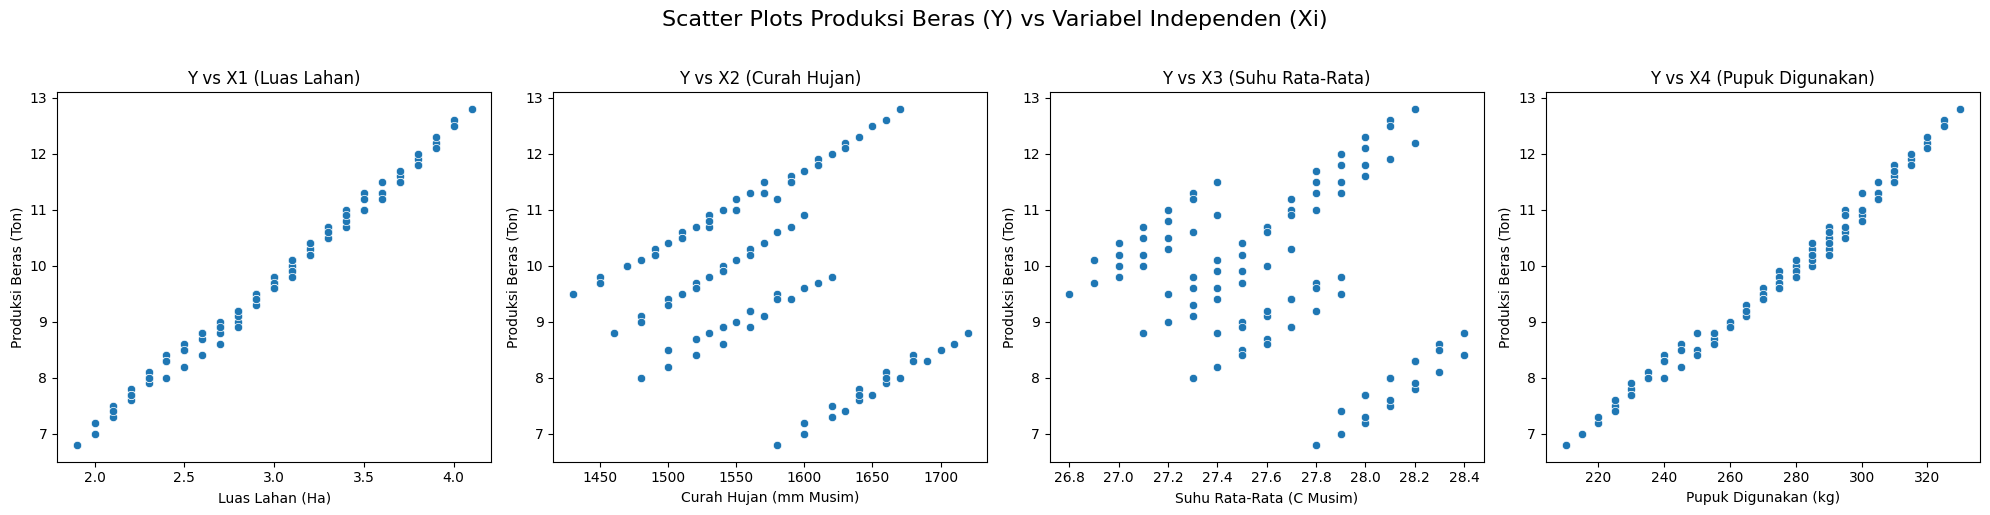


============== Visualisasi Perbandingan Y Asli dan Y Prediksi ==============


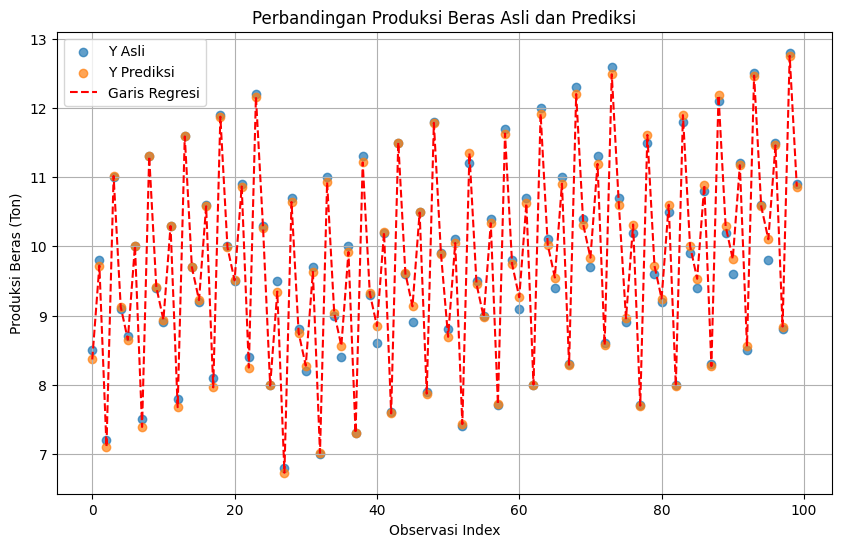


============== Visualisasi Sisaan (Residuals) ==============


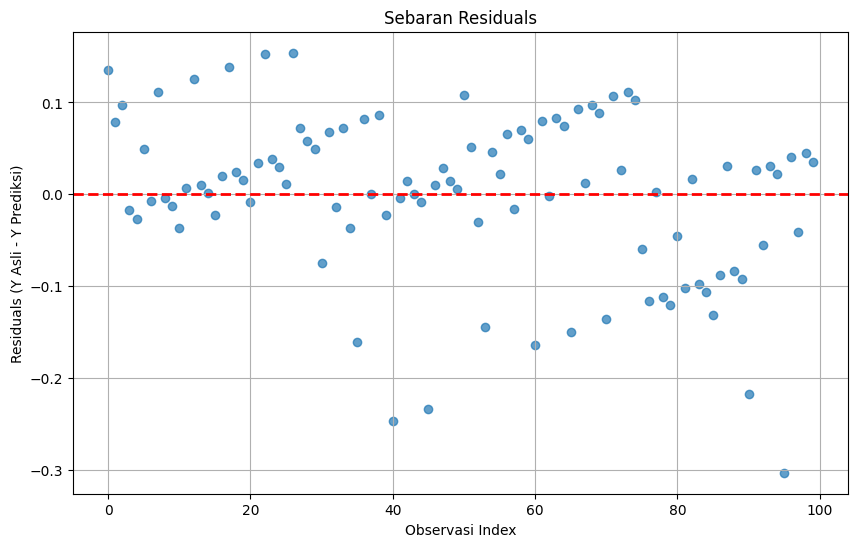

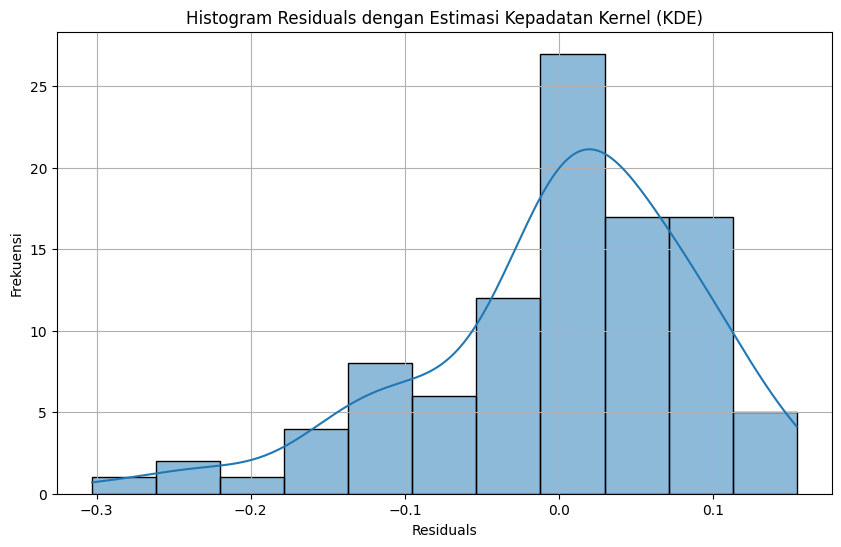


============== QQ-Plot Residuals (untuk mengecek kenormalan) ==============


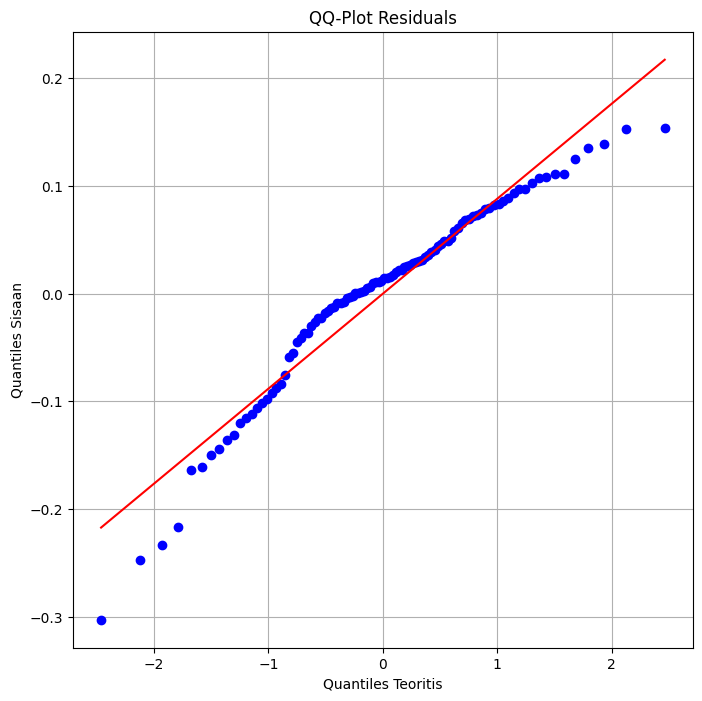


============== Plot Residuals vs Fitted Values (untuk mengecek homoskedastisitas) ==============


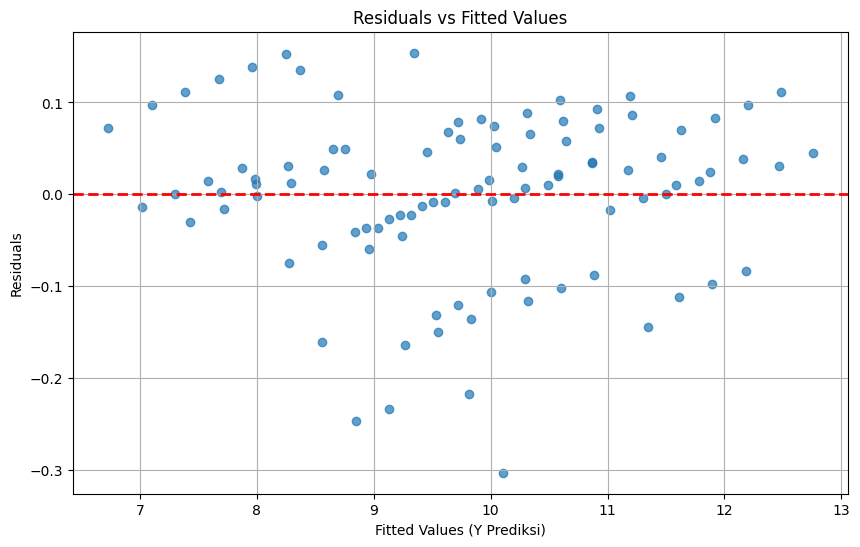

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi Sebaran Data (Scatter Plots) antara Y dan setiap Xi
print("\n============== Visualisasi Sebaran Data (Scatter Plots) ==============")

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
fig.suptitle('Scatter Plots Produksi Beras (Y) vs Variabel Independen (Xi)', y=1.02, fontsize=16)

sns.scatterplot(data=df, x='X1', y='Y', ax=axes[0])
axes[0].set_title('Y vs X1 (Luas Lahan)')
axes[0].set_xlabel('Luas Lahan (Ha)')
axes[0].set_ylabel('Produksi Beras (Ton)')

sns.scatterplot(data=df, x='X2', y='Y', ax=axes[1])
axes[1].set_title('Y vs X2 (Curah Hujan)')
axes[1].set_xlabel('Curah Hujan (mm Musim)')
axes[1].set_ylabel('Produksi Beras (Ton)')

sns.scatterplot(data=df, x='X3', y='Y', ax=axes[2])
axes[2].set_title('Y vs X3 (Suhu Rata-Rata)')
axes[2].set_xlabel('Suhu Rata-Rata (C Musim)')
axes[2].set_ylabel('Produksi Beras (Ton)')

sns.scatterplot(data=df, x='X4', y='Y', ax=axes[3])
axes[3].set_title('Y vs X4 (Pupuk Digunakan)')
axes[3].set_xlabel('Pupuk Digunakan (kg)')
axes[3].set_ylabel('Produksi Beras (Ton)')

plt.tight_layout()
plt.show()

# Visualisasi Perbandingan Y Asli dan Y Prediksi
print("\n============== Visualisasi Perbandingan Y Asli dan Y Prediksi ==============")

plt.figure(figsize=(10, 6))
plt.scatter(df.index, Y, label='Y Asli', alpha=0.7)
plt.scatter(df.index, y_pred, label='Y Prediksi', alpha=0.7)
plt.plot(df.index, y_pred, color='red', linestyle='--', label='Garis Regresi')
plt.xlabel('Observasi Index')
plt.ylabel('Produksi Beras (Ton)')
plt.title('Perbandingan Produksi Beras Asli dan Prediksi')
plt.legend()
plt.grid(True)
plt.show()

# Visualisasi Residuals (Sisaan)
print("\n============== Visualisasi Sisaan (Residuals) ==============")
residuals = Y - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(df.index, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Observasi Index')
plt.ylabel('Residuals (Y Asli - Y Prediksi)')
plt.title('Sebaran Residuals')
plt.grid(True)
plt.show()

# Histogram Residuals (untuk mengecek kenormalan)
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frekuensi')
plt.title('Histogram Residuals dengan Estimasi Kepadatan Kernel (KDE)')
plt.grid(True)
plt.show()

# QQ-Plot Residuals (untuk mengecek kenormalan)
print("\n============== QQ-Plot Residuals (untuk mengecek kenormalan) ==============")
plt.figure(figsize=(8, 8))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ-Plot Residuals')
plt.xlabel('Quantiles Teoritis')
plt.ylabel('Quantiles Sisaan')
plt.grid(True)
plt.show()

# Plot Residuals vs Fitted Values (untuk mengecek homoskedastisitas)
print("\n============== Plot Residuals vs Fitted Values (untuk mengecek homoskedastisitas) ==============")
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Fitted Values (Y Prediksi)')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import f

X_full = df[['X1', 'X2', 'X3', 'X4']]
Y = df['Y'].values.reshape(-1, 1)
n = len(Y)
alpha = 0.05

# Inisialisasi
selected_vars = []  # variabel yang masuk
remaining_vars = list(X_full.columns)

# Stepwise forward
while remaining_vars:
    R_squared_candidates = {}

    for var in remaining_vars:
        vars_to_test = selected_vars + [var]
        X_temp = X_full[vars_to_test].values
        X_temp = np.column_stack((np.ones(len(X_temp)), X_temp))
        beta = np.linalg.inv(X_temp.T @ X_temp) @ X_temp.T @ Y
        Y_pred = X_temp @ beta
        JKT = np.sum((Y - np.mean(Y))**2)
        JKR = np.sum((Y_pred - np.mean(Y))**2)
        R2 = JKR / JKT
        R_squared_candidates[var] = R2

    # Ambil variabel dengan R² tertinggi
    best_var = max(R_squared_candidates, key=R_squared_candidates.get)
    best_R2 = R_squared_candidates[best_var]

    # Hitung Fhitung untuk membandingkan penambahan variabel
    if selected_vars:
        k = len(selected_vars)
        prev_X = X_full[selected_vars].values
        prev_X = np.column_stack((np.ones(len(prev_X)), prev_X))
        prev_beta = np.linalg.inv(prev_X.T @ prev_X) @ prev_X.T @ Y
        Y_prev = prev_X @ prev_beta
        JKT = np.sum((Y - np.mean(Y))**2)
        JKR_prev = np.sum((Y_prev - np.mean(Y))**2)
        df1 = 1
        df2 = n - k - 2
        Fhitung = ((best_R2 - (JKR_prev / JKT)) / df1) / ((1 - best_R2) / df2)
        Ftabel = f.ppf(1 - alpha, df1, df2)
        if Fhitung > Ftabel:
            selected_vars.append(best_var)
            remaining_vars.remove(best_var)
        else:
            break
    else:
        selected_vars.append(best_var)
        remaining_vars.remove(best_var)

print("Variabel terbaik berdasarkan regresi bertahap:", selected_vars)


Variabel terbaik berdasarkan regresi bertahap: ['X1', 'X2', 'X4']


In [ ]:
print("\n============== Analisis untuk X3 ketika X1 sudah ada dalam model ==============")

# JKR(X1, X3) - JKR(X1) memberikan jumlah kuadrat regresi tambahan yang dijelaskan oleh X3 ketika X1 sudah ada.
JKR_tambahan_X3_setelah_X1 = JKR_X1X3 - JKR_X1
print(f"JKR X3 setelah X1 masuk model: {JKR_tambahan_X3_setelah_X1:.4f}")

# JKG untuk model dengan (X1, X3)
JKG_X1X3 = JKT - JKR_X1X3
print(f"JKG untuk model (X1, X3): {JKG_X1X3:.4f}")

# Estimasi varians error (s^2) untuk model dengan (X1, X3)
# df2 = n - k - 1, dengan k=2 (X1 dan X3)
k_X1X3 = 2
df2_X1X3 = n - k_X1X3 - 1
s_kuadrat_X1X3 = JKG_X1X3 / df2_X1X3
print(f"Estimasi Varians Error (s^2) untuk model (X1, X3): {s_kuadrat_X1X3:.4f}")

# Menghitung F-hitung untuk menguji signifikansi penambahan X3 setelah X1
# F-hitung = [JKR(X1, X3) - JKR(X1)] / s^2(X1, X3)
# df1 = jumlah peubah tambahan = 1 (X3)
# df2 = df2 untuk model yang lebih besar (X1, X3) = n - k_X1X3 - 1
F_hitung_X3_setelah_X1 = (JKR_tambahan_X3_setelah_X1 / 1) / s_kuadrat_X1X3
print(f"F-hitung untuk X3 setelah X1 masuk model: {F_hitung_X3_setelah_X1:.4f}")

# Menghitung F-tabel untuk menguji signifikansi penambahan X3
alpha = 0.05
df1_F_X3 = 1  # Menambahkan 1 variabel (X3)
df2_F_X3 = n - k_X1X3 - 1 # Derajat kebebasan error untuk model yang lebih besar
F_tabel_X3_setelah_X1 = f.ppf(1 - alpha, df1_F_X3, df2_F_X3)
print(f"F-tabel (alpha={alpha}, df1={df1_F_X3}, df2={df2_F_X3}) untuk X3 setelah X1: {F_tabel_X3_setelah_X1:.4f}")

# Analisis hasil F-test untuk X3 setelah X1
print("\n============== Analisis Hasil F-test untuk X3 setelah X1 ==============")
if F_hitung_X3_setelah_X1 > F_tabel_X3_setelah_X1:
    print(f"F-hitung X3 setelah X1 ({F_hitung_X3_setelah_X1:.4f}) > F-tabel ({F_tabel_X3_setelah_X1:.4f}).")
    print("Tolak H0: X3 memberikan kontribusi signifikan terhadap model regresi ketika X1 sudah ada.")
else:
    print(f"F-hitung X3 setelah X1 ({F_hitung_X3_setelah_X1:.4f}) <= F-tabel ({F_tabel_X3_setelah_X1:.4f}).")
    print("Gagal tolak H0: X3 tidak memberikan kontribusi signifikan terhadap model regresi ketika X1 sudah ada.")


print("\n============== Analisis untuk X4 ketika X1 sudah ada dalam model ==============")

# JKR(X1, X4) - JKR(X1) memberikan jumlah kuadrat regresi tambahan yang dijelaskan oleh X4 ketika X1 sudah ada.
JKR_tambahan_X4_setelah_X1 = JKR_X1X4 - JKR_X1
print(f"JKR X4 setelah X1 masuk model: {JKR_tambahan_X4_setelah_X1:.4f}")

# JKG untuk model dengan (X1, X4)
JKG_X1X4 = JKT - JKR_X1X4
print(f"JKG untuk model (X1, X4): {JKG_X1X4:.4f}")

# Estimasi varians error (s^2) untuk model dengan (X1, X4)
# df2 = n - k - 1, dengan k=2 (X1 dan X4)
k_X1X4 = 2
df2_X1X4 = n - k_X1X4 - 1
s_kuadrat_X1X4 = JKG_X1X4 / df2_X1X4
print(f"Estimasi Varians Error (s^2) untuk model (X1, X4): {s_kuadrat_X1X4:.4f}")

# Menghitung F-hitung untuk menguji signifikansi penambahan X4 setelah X1
# F-hitung = [JKR(X1, X4) - JKR(X1)] / s^2(X1, X4)
# df1 = jumlah peubah tambahan = 1 (X4)
# df2 = df2 untuk model yang lebih besar (X1, X4) = n - k_X1X4 - 1
F_hitung_X4_setelah_X1 = (JKR_tambahan_X4_setelah_X1 / 1) / s_kuadrat_X1X4
print(f"F-hitung untuk X4 setelah X1 masuk model: {F_hitung_X4_setelah_X1:.4f}")

# Menghitung F-tabel untuk menguji signifikansi penambahan X4
alpha = 0.05
df1_F_X4 = 1  # Menambahkan 1 variabel (X4)
df2_F_X4 = n - k_X1X4 - 1 # Derajat kebebasan error untuk model yang lebih besar
F_tabel_X4_setelah_X1 = f.ppf(1 - alpha, df1_F_X4, df2_F_X4)
print(f"F-tabel (alpha={alpha}, df1={df1_F_X4}, df2={df2_F_X4}) untuk X4 setelah X1: {F_tabel_X4_setelah_X1:.4f}")

# Analisis hasil F-test untuk X4 setelah X1
print("\n============== Analisis Hasil F-test untuk X4 setelah X1 ==============")
if F_hitung_X4_setelah_X1 > F_tabel_X4_setelah_X1:
    print(f"F-hitung X4 setelah X1 ({F_hitung_X4_setelah_X1:.4f}) > F-tabel ({F_tabel_X4_setelah_X1:.4f}).")
    print("Tolak H0: X4 memberikan kontribusi signifikan terhadap model regresi ketika X1 sudah ada.")
else:
    print(f"F-hitung X4 setelah X1 ({F_hitung_X4_setelah_X1:.4f}) <= F-tabel ({F_tabel_X4_setelah_X1:.4f}).")
    print("Gagal tolak H0: X4 tidak memberikan kontribusi signifikan terhadap model regresi ketika X1 sudah ada.")

# === Bandingkan F-hitung tambahan untuk X2, X3, X4 setelah X1 ===
print("\n============== Perbandingan F-hitung Tambahan Setelah X1 Masuk ==============")
print(f"F-hitung untuk X2 setelah X1: {F_hitung_X2_setelah_X1:.4f}")
print(f"F-hitung untuk X3 setelah X1: {F_hitung_X3_setelah_X1:.4f}")
print(f"F-hitung untuk X4 setelah X1: {F_hitung_X4_setelah_X1:.4f}")

# Tentukan variabel mana yang akan dimasukkan selanjutnya (jika ada yang signifikan)
# Pilih yang F-hitung tambahannya paling besar DI ATAS F-tabel.
signifikan_untuk_ditambah = []
if F_hitung_X2_setelah_X1 > F_tabel_X2_setelah_X1:
    signifikan_untuk_ditambah.append(('X2', F_hitung_X2_setelah_X1))
if F_hitung_X3_setelah_X1 > F_tabel_X3_setelah_X1:
    signifikan_untuk_ditambah.append(('X3', F_hitung_X3_setelah_X1))
if F_hitung_X4_setelah_X1 > F_tabel_X4_setelah_X1:
    signifikan_untuk_ditambah.append(('X4', F_hitung_X4_setelah_X1))

if signifikan_untuk_ditambah:
    # Urutkan berdasarkan F-hitung terbesar
    signifikan_untuk_ditambah.sort(key=lambda item: item[1], reverse=True)
    next_variable_to_add = signifikan_untuk_ditambah[0][0]
    print(f"\nVariabel independen selanjutnya yang akan dimasukkan ke dalam model (setelah X1) adalah: {next_variable_to_add}")

    # === Jika X2 yang dipilih (karena F-hitungnya terbesar dan signifikan) ===
    if next_variable_to_add == 'X2':
        print("\n============== Langkah Selanjutnya: Memasukkan X2 ke dalam Model ==============")
        print("Model sementara: Y = b0 + b1*X1 + b2*X2")

        # Sekarang, model terdiri dari X1 dan X2. Kita perlu menguji kembali
        # apakah X1 masih signifikan dalam model yang sekarang mengandung X2.
        print("\n============== Menguji Kembali Signifikansi X1 ketika X2 sudah ada dalam model ==============")
        # F_hitung_X1_setelah_X2 dan F_tabel_X1_setelah_X2 sudah dihitung sebelumnya
        if F_hitung_X1_setelah_X2 > F_tabel_X1_setelah_X2:
            print(f"F-hitung X1 setelah X2 ({F_hitung_X1_setelah_X2:.4f}) > F-tabel ({F_tabel_X1_setelah_X2:.4f}).")
            print("Tolak H0: X1 masih memberikan kontribusi signifikan terhadap model regresi ketika X2 sudah ada.")
            print("X1 tetap dalam model.")
            current_model_vars = ['X1', 'X2']
            current_JKR = JKR_X1X2
            current_JKG = JKG_X1X2
            current_k = k_X1X2
            current_s_kuadrat = s_kuadrat_X1X2

        else:
            print(f"F-hitung X1 setelah X2 ({F_hitung_X1_setelah_X2:.4f}) <= F-tabel ({F_tabel_X1_setelah_X2:.4f}).")
            print("Gagal tolak H0: X1 tidak lagi signifikan ketika X2 sudah ada dalam model.")
            print("Dalam metode bertahap, X1 dapat dikeluarkan dari model.")
            current_model_vars = ['X2'] # X1 dikeluarkan
            # Perlu menghitung ulang JKR, JKG, s^2 untuk model hanya dengan X2
            current_JKR = JKR_X2
            current_JKG = JKT - JKR_X2
            current_k = 1
            current_s_kuadrat = current_JKG / (n - current_k - 1)
            print(f"Model sementara setelah mengeluarkan X1: Y = b0 + b2*X2")


        # Lanjutkan iterasi dengan model saat ini (misalnya model dengan X1 dan X2 jika X1 tidak dikeluarkan)
        # Langkah selanjutnya adalah mengevaluasi variabel yang tersisa di luar model saat ini (X3, X4)
        # dan melihat mana yang memberikan kontribusi signifikan terbesar JIKA DITAMBAHKAN ke model saat ini.

        remaining_vars = [v for v in ['X1', 'X2', 'X3', 'X4'] if v not in current_model_vars]
        print(f"\nVariabel independen yang tersisa di luar model: {remaining_vars}")

        if remaining_vars:
             print(f"\n============== Mengevaluasi Variabel yang Tersisa untuk Ditambahkan ke Model ({current_model_vars}) ==============")
             # Di sini Anda akan menghitung R-squared untuk model (current_model_vars + setiap remaining_vars)
             # dan menghitung F-hitung tambahan untuk setiap remaining_vars setelah current_model_vars ada.
             # Proses ini akan terus berulang.

             # Contoh untuk langkah selanjutnya jika current_model_vars adalah ['X1', 'X2']
             # Kita perlu menghitung F-hitung tambahan untuk X3 setelah X1, X2 dan F-hitung tambahan untuk X4 setelah X1, X2

             if 'X3' in remaining_vars:
                 # Hitung JKR untuk model (X1, X2, X3)
                 A_X1X2X3 = np.array([
                     [n, jumlah_x1, jumlah_x2, jumlah_x3],
                     [jumlah_x1, jumlah_x1_kuadrat, jumlah_x1_x2, jumlah_x1_x3],
                     [jumlah_x2, jumlah_x1_x2, jumlah_x2_kuadrat, jumlah_x2_x3],
                     [jumlah_x3, jumlah_x1_x3, jumlah_x2_x3, jumlah_x3_kuadrat]
                 ])
                 b_X1X2X3 = np.array([jumlah_y, jumlah_x1_y, jumlah_x2_y, jumlah_x3_y])

                 try:
                     beta_X1X2X3 = np.linalg.solve(A_X1X2X3, b_X1X2X3)
                     y_pred_X1X2X3 = beta_X1X2X3[0] + beta_X1X2X3[1]*df['X1'] + beta_X1X2X3[2]*df['X2'] + beta_X1X2X3[3]*df['X3']
                     JKR_X1X2X3 = ((y_pred_X1X2X3 - y_bar)**2).sum()

                     # F-hitung tambahan X3 setelah X1, X2
                     # JKR(X1, X2, X3) - JKR(X1, X2)
                     JKR_tambahan_X3_setelah_X1X2 = JKR_X1X2X3 - JKR_X1X2
                     k_X1X2X3 = 3
                     JKG_X1X2X3 = JKT - JKR_X1X2X3
                     df2_X1X2X3 = n - k_X1X2X3 - 1
                     s_kuadrat_X1X2X3 = JKG_X1X2X3 / df2_X1X2X3

                     F_hitung_X3_setelah_X1X2 = (JKR_tambahan_X3_setelah_X1X2 / 1) / s_kuadrat_X1X2X3
                     F_tabel_X3_setelah_X1X2 = f.ppf(1 - alpha, 1, df2_X1X2X3)

                     print(f"F-hitung untuk X3 setelah X1, X2 masuk model: {F_hitung_X3_setelah_X1X2:.4f} (F-tabel: {F_tabel_X3_setelah_X1X2:.4f})")
                     if F_hitung_X3_setelah_X1X2 > F_tabel_X3_setelah_X1X2:
                         print("-> X3 signifikan untuk ditambahkan.")
                     else:
                         print("-> X3 tidak signifikan untuk ditambahkan.")

                 except np.linalg.LinAlgError:
                     print("Error: Matriks koefisien untuk model (X1, X2, X3) tidak memiliki invers.")

             if 'X4' in remaining_vars:
                 # Hitung JKR untuk model (X1, X2, X4)
                  A_X1X2X4 = np.array([
                     [n, jumlah_x1, jumlah_x2, jumlah_x4],
                     [jumlah_x1, jumlah_x1_kuadrat, jumlah_x1_x2, jumlah_x1_x4],
                     [jumlah_x2, jumlah_x1_x2, jumlah_x2_kuadrat, jumlah_x2_x4],
                     [jumlah_x4, jumlah_x1_x4, jumlah_x2_x4, jumlah_x4_kuadrat]
                 ])
                  b_X1X2X4 = np.array([jumlah_y, jumlah_x1_y, jumlah_x2_y, jumlah_x4_y])

                  try:
                     beta_X1X2X4 = np.linalg.solve(A_X1X2X4, b_X1X2X4)
                     y_pred_X1X2X4 = beta_X1X2X4[0] + beta_X1X2X4[1]*df['X1'] + beta_X1X2X4[2]*df['X2'] + beta_X1X2X4[3]*df['X4']
                     JKR_X1X2X4 = ((y_pred_X1X2X4 - y_bar)**2).sum()

                     # F-hitung tambahan X4 setelah X1, X2
                     # JKR(X1, X2, X4) - JKR(X1, X2)
                     JKR_tambahan_X4_setelah_X1X2 = JKR_X1X2X4 - JKR_X1X2
                     k_X1X2X4 = 3
                     JKG_X1X2X4 = JKT - JKR_X1X2X4
                     df2_X1X2X4 = n - k_X1X2X4 - 1
                     s_kuadrat_X1X2X4 = JKG_X1X2X4 / df2_X1X2X4

                     F_hitung_X4_setelah_X1X2 = (JKR_tambahan_X4_setelah_X1X2 / 1) / s_kuadrat_X1X2X4
                     F_tabel_X4_setelah_X1X2 = f.ppf(1 - alpha, 1, df2_X1X2X4)

                     print(f"F-hitung untuk X4 setelah X1, X2 masuk model: {F_hitung_X4_setelah_X1X2:.4f} (F-tabel: {F_tabel_X4_setelah_X1X2:.4f})")
                     if F_hitung_X4_setelah_X1X2 > F_tabel_X4_setelah_X1X2:
                         print("-> X4 signifikan untuk ditambahkan.")
                     else:
                         print("-> X4 tidak signifikan untuk ditambahkan.")

                  except np.linalg.LinAlgError:
                     print("Error: Matriks koefisien untuk model (X1, X2, X4) tidak memiliki invers.")


             # Anda akan memilih variabel yang memberikan F-hitung tambahan terbesar (di atas F-tabel)
             # Jika ada, tambahkan variabel tersebut ke current_model_vars, perbarui current_JKR, current_JKG, dll.
             # Kemudian ULANGI langkah 3: uji kembali signifikansi SEMUA variabel di current_model_vars.
             # Proses ini berulang sampai tidak ada variabel baru yang bisa ditambahkan atau variabel yang ada perlu dikeluarkan.


        else:
             print("\nTidak ada variabel independen yang tersisa di luar model. Proses penambahan variabel selesai.")

    # === Jika X3 yang dipilih (karena F-hitungnya terbesar dan signifikan) ===
    elif next_variable_to_add == 'X3':
        print("\n============== Langkah Selanjutnya: Memasukkan X3 ke dalam Model ==============")
        print("Model sementara: Y = b0 + b1*X1 + b3*X3")

        # Uji kembali signifikansi X1 ketika X3 sudah ada
        # (Anda perlu menghitung F-hitung X1 setelah X3, mirip dengan F_hitung_X1_setelah_X2)
        # ... (hitung F_hitung_X1_setelah_X3 dan F_tabel_X1_setelah_X3)
        # ... (bandingkan dan tentukan apakah X1 tetap atau dikeluarkan)

        current_model_vars = ['X1', 'X3'] # atau ['X3'] jika X1 dikeluarkan
        current_JKR = JKR_X1X3 # atau JKR_X3 jika X1 dikeluarkan
        current_k = k_X1X3 # atau 1 jika X1 dikeluarkan
        current_JKG = JKT - current_JKR
        current_s_kuadrat = current_JKG / (n - current_k - 1)

        # Lanjutkan iterasi dengan mengevaluasi variabel yang tersisa (X2, X4) untuk ditambahkan

    # === Jika X4 yang dipilih (karena F-hitungnya terbesar dan signifikan) ===
    elif next_variable_to_add == 'X4':
        print("\n============== Langkah Selanjutnya: Memasukkan X4 ke dalam Model ==============")
        print("Model sementara: Y = b0 + b1*X1 + b4*X4")

        # Uji kembali signifikansi X1 ketika X4 sudah ada
        # (Anda perlu menghitung F-hitung X1 setelah X4)
        # ... (hitung F_hitung_X1_setelah_X4 dan F_tabel_X1_setelah_X4)
        # ... (bandingkan dan tentukan apakah X1 tetap atau dikeluarkan)

        current_model_vars = ['X1', 'X4'] # atau ['X4'] jika X1 dikeluarkan
        current_JKR = JKR_X1X4 # atau JKR_X4 jika X1 dikeluarkan
        current_k = k_X1X4 # atau 1 jika X1 dikeluarkan
        current_JKG = JKT - current_JKR
        current_s_kuadrat = current_JKG / (n - current_k - 1)

        # Lanjutkan iterasi dengan mengevaluasi variabel yang tersisa (X2, X3) untuk ditambahkan

else:
    print("\nTidak ada variabel independen lain yang memberikan kontribusi signifikan setelah X1 masuk model.")
    print("Model terbaik adalah yang hanya mengandung X1: Y = b0 + b1*X1.")
    current_model_vars = ['X1']
    current_JKR = JKR_X1
    current_JKG = JKG_X1
    current_k = k_X1
    current_s_kuadrat = s_kuadrat_X1


# Catatan: Proses ini harus diulang secara sistematis (iteratif) sampai tidak ada lagi
# variabel yang bisa ditambahkan dan tidak ada variabel yang perlu dikeluarkan.
# Implementasi penuh regresi bertahap dalam kode akan melibatkan loop yang cukup kompleks
# untuk mengelola daftar variabel di dalam dan di luar model, serta melakukan uji F
# untuk penambahan dan penghapusan di setiap langkah. Kode di atas memberikan
# perhitungan untuk langkah-langkah awal sebagai panduan untuk melanjutkan.
# Anda perlu mengembangkan logika iteratif berdasarkan perbandingan F-hitung dan F-tabel
# untuk penambahan dan penghapusan variabel.



============== Analisis untuk X3 ketika X1 sudah ada dalam model ==============
JKR X3 setelah X1 masuk model: 0.1174
JKG untuk model (X1, X3): 1.3696
Estimasi Varians Error (s^2) untuk model (X1, X3): 0.0141
F-hitung untuk X3 setelah X1 masuk model: 8.3181
F-tabel (alpha=0.05, df1=1, df2=97) untuk X3 setelah X1: 3.9391

============== Analisis Hasil F-test untuk X3 setelah X1 ==============
F-hitung X3 setelah X1 (8.3181) > F-tabel (3.9391).
Tolak H0: X3 memberikan kontribusi signifikan terhadap model regresi ketika X1 sudah ada.

============== Analisis untuk X4 ketika X1 sudah ada dalam model ==============
JKR X4 setelah X1 masuk model: 0.0968
JKG untuk model (X1, X4): 1.3902
Estimasi Varians Error (s^2) untuk model (X1, X4): 0.0143
F-hitung untuk X4 setelah X1 masuk model: 6.7534
F-tabel (alpha=0.05, df1=1, df2=97) untuk X4 setelah X1: 3.9391

============== Analisis Hasil F-test untuk X4 setelah X1 ==============
F-hitung X4 setelah X1 (6.7534) > F-tabel (3.9391).
Tolak H0: X4 m